-----

<div style="text-align: center; margin: 20px 0;">
    <p style="color: #000; font-size: 36px; text-align: center; font-weight: bold; margin: 0;">Videojuegos 
    </p>
    <p style="color: #000; font-size: 20px; text-align: center;  margin: 10px 0;">
        ¿Cómo podemos hacerlos un éxito?
    </p>
</div>

---

**Trabajo ficticio como científica de datos en ICE, una tienda de videojuegos en línea**.  
**El año es 2016 y estamos planificando el rumbo para 2017**.

## 1. Introducción

El **objetivo principal** es identificar patrones que determinen si un juego es exitoso o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.  

Se pondrán a prueba hipótesis, entre ellas, determinar si la puntuación promedio de los usuarios es la misma para dos de las principales plataformas (Xbox One y PC). Otra hipótesis a verificar es si la puntuación promedio de los usuarios para los géneros de acción y deportes difiere entre sí.

## 2. Diccionario

**`games.csv:`**  
- `'Name'`: Nombre del videojuego.  
- `'Platform'`: Consola donde se juega el videojuego.  
- `'Year_of_Release'`: Año de lanzamiento.  
- `'Genre'`: Géneros como deportes y acción.  
- `'NA_sales'`: Ventas en América del Norte en millones de dólares estadounidenses.  
- `'EU_sales'`: Ventas en Europa en millones de dólares estadounidenses.  
- `'JP_sales'`: Ventas en Japón en millones de dólares estadounidenses.  
- `'Other_sales'`: Ventas en otros países en millones de dólares estadounidenses.  
- `'Critic_Score'`: Escala de calificación de 0 a 100.  
- `'User_Score'`: Escala de calificación de 0 a 10.  
- `'Rating'`: La Entertainment Software Rating Board (ESRB) es una organización que asigna calificaciones de edad y contenido a los videojuegos para consumidores.  

## 3. Librerias y Dataset

In [1]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind

In [2]:
# Read dataset and create its variable 'games'
games = pd.read_csv('games.csv') 

## 4. Análisis exploratorio de datos

### 4.1 Revisión del Dataframe

In [3]:
print('Info. about the DataFrame Games:')
games.info()
print('\nFirst 20 rows of Games:')
games.head(20)

Info. about the DataFrame Games:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

First 20 rows of Games:


Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   

   User_Score Rating  
0           8      E  
1         NaN    NaN  
2         8.3      E  
3           8      E  
4         NaN    NaN  
5         NaN    NaN  
6         8.5      E  
7         6.6      E  
8         8.4      E  
9         NaN    NaN  
10        NaN    NaN  
11        8.6      E  
12        NaN    NaN  
13        7.7      E  
14        6.3      E  
15        7.4      E  
16        8.2      M  
17          9      M  
18        NaN    NaN  
19        7.9      E

**Puntos a desarrollar:**  

1. El conjunto de datos tiene 16715 filas y 11 columnas.  

2. Los nombres de las columnas deberían estar en minúsculas.  

3. Algunos tipos de datos son incorrectos, como `['User_score']`, que puede ser `float64`, y también `['Year_of_Release']`, que debe ser un `int64`.  

4. Columnas con valores faltantes y número total de entradas:  
   - `['Name']` 16713: casi ningún valor NaN.  
   - `['Year_of_Release']` 16446: algunos valores NaN.  
   - `['Genre']` 16713: casi ningún valor NaN.  
   - `['Critic_score']` 8137: número alarmante de valores NaN.  
   - `['User_score']` 10014: número significativo de valores NaN.  
   - `['Rating']` 9949: número alarmante de valores NaN.  

5. Los datos serán analizados más a fondo para determinar qué hacer con las columnas que tienen un número alarmante de valores faltantes.  

## 5. Manipulación de datos

In [4]:
# Change the format name of the columns to lowercase 
games.columns = games.columns.str.lower()
print('Name of the columns in lowercase:')
games.columns.tolist()

Name of the columns in lowercase:


['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [247]:
# Check for duplicate rows
duplicate_rows = games[games.duplicated()]
# Results
if duplicate_rows.empty:
    print("Duplicate rows: 0 ")
else:
    print(duplicate_rows) 

Duplicate rows: 0 


### 5.1 Valores faltantes y tipos de datos  

Los valores NaN serán tratados, y los tipos de datos serán convertidos a los tipos apropiados según sea necesario.  

####  5.1.1 Name

In [248]:
# Name missing values total 
games[games['name'].isnull()]

# Delete the two NaN
games.dropna(subset=['name'], inplace=True)

# Results
if games['name'].isnull().sum() == 0:
    print("Name missing values: 0")
else:
    print(games[games['name'].isnull()])

Name missing values: 0


####  5.1.2  Year_of_release

In [249]:
# Year_of_release missing values total
games[games['year_of_release'].isnull()]

# Delete the 269 NaN (is a small number compare to the dataset)
games.dropna(subset=['year_of_release'], inplace=True)

# Results
if games['year_of_release'].isnull().sum() == 0:
    print("Year_of_release missing values: 0")
else:
    print(games[games['year_of_release'].isnull()])

Year_of_release missing values: 0


In [250]:
# Convert the dtype from float to int
games['year_of_release'] = games['year_of_release'].astype(int)
dtype = games['year_of_release'].dtype
print('Correct dtype:', dtype)

Correct dtype: int64


####   5.1.3  Genre

In [251]:
# Genre missing values total
games[games['genre'].isnull()]

# Already drop them with the missing values of names or year_of_release.

# Results
if games['genre'].isnull().sum() == 0:
    print("Genre missing values: 0")
else:
    print(games[games['genre'].isnull()])

Genre missing values: 0


####   5.1.4 Critic_score

In [252]:
# Critic_score missing values total: 8461
games[games['critic_score'].isnull()]

# Around half of the data is missing

# print the unique values to check if there's an odd entry
print("Unique values of 'critic_score':")
games['critic_score'].unique()

Unique values of 'critic_score':


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

El tipo de dato puede convertirse a entero (`int`), y los valores NaN deben ser tratados, ya que hay una cantidad significativa de ellos.  

In [253]:
# Convert the dtype from float to int
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
dtype = games['critic_score'].dtype
print('Correct dtype:', dtype)

Correct dtype: float64


In [254]:
# Filling missing values 
games['critic_score'] = games['critic_score'].fillna(
    np.ceil(games.groupby('genre')['critic_score'].transform('mean'))
    )
 # Correct dtype 
games['critic_score'] = games['critic_score'].astype(int)

# Results
if games['critic_score'].isnull().sum() == 0:
    print("Critic_score missing values: 0")
else:
    print(games[games['critic_score'].isnull()])

Critic_score missing values: 0


Los valores faltantes en `['critic_score']` se rellenaron utilizando la mediana agrupada por `['genre']`.  

####   5.1.5  User_score

In [255]:
# User_score missing values total: 6605
games[games['user_score'].isnull()]

# Almost half of the data is missing

# print the unique values to check if there's an odd entry
print("Unique values of 'user_score':")
games['user_score'].unique() 

Unique values of 'user_score':


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

El tipo de dato debe ser `float`, y los valores `'tbd'` deben ser cambiados a `NaN`. Además, los valores `NaN` deben ser tratados, ya que hay una cantidad significativa de ellos. 

In [256]:
# Replace tbt with NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# Results
games['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [257]:
# Covert dtype from object to float
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
dtype = games['user_score'].dtype
print('Correct dtype:', dtype)

Correct dtype: float64


In [258]:
# Filling missing values 
games['user_score'] = games['user_score'].fillna(
    games.groupby('genre')['user_score'].transform('mean')
    )

games['user_score'] = games['user_score'].apply(lambda x: round(x, 1)) # with one decimal only

# Results
if games['user_score'].isnull().sum() == 0:
    print("User_score missing values: 0")
else:
    print(games[games['user_score'].isnull()])    

User_score missing values: 0


Los valores faltantes en `['user_score']` se rellenaron utilizando la mediana agrupada por `['genre']`.  

####   5.1.6 Rating

In [259]:
# Rating missing values total: 6676
games[games['rating'].isnull()]

# Almost half of the data is missing

# print the unique values to check if there's an odd entry
games['rating'].unique() 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Los valores `NaN` deben ser tratados, ya que hay una cantidad significativa de ellos faltantes.  

In [260]:
# Display rating categories and value counts

games['rating'] = games['rating'].fillna('RP')

print('ESRB rating categories:')
games['rating'].value_counts()

ESRB rating categories:


rating
RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: count, dtype: int64

**Explicación de las calificaciones ESRB:**  
- **E**: Todos (K-A), adecuado para todas las edades.  
- **T**: Adolescentes, adecuado para mayores de 13 años.  
- **M**: Madura, adecuado para mayores de 17 años.  
- **E10+**: Todos, adecuado para mayores de 10 años.  
- **EC**: Primeros años de la infancia, para niños en edad preescolar.  
- **RP**: Calificación pendiente.  
- **AO**: Solo para adultos, adecuado para mayores de 18 años.

In [261]:
# Adjust categories 
games['rating'] = games['rating'].replace('EC', 'E')
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('AO', 'M')
print('ESRB rating categories:')
games['rating'].value_counts()

ESRB rating categories:


rating
RP      6677
E       3932
T       2905
M       1537
E10+    1393
Name: count, dtype: int64

In [262]:
# Missing values results
if games['rating'].isnull().sum() == 0:
    print("Rating missing values: 0")
else:
    print(games[games['rating'].isnull()])    

Rating missing values: 0


### 5.2 Ventas totales por videojuego  

In [263]:
# Total_sales new column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77            69         7.3     RP   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00            73         7.6     RP   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

## 6.  Análisis de datos

### 6.1 Videojuegos lanzados cada año (1980-2016)

#### 6.1.1 ¿Cuántos juegos salieron a la venta cada año?

Veamos la distribución de los videojuegos y sus ventas. 

En primer lugar, veamos cuántos videojuegos salieron a la venta en cada año.

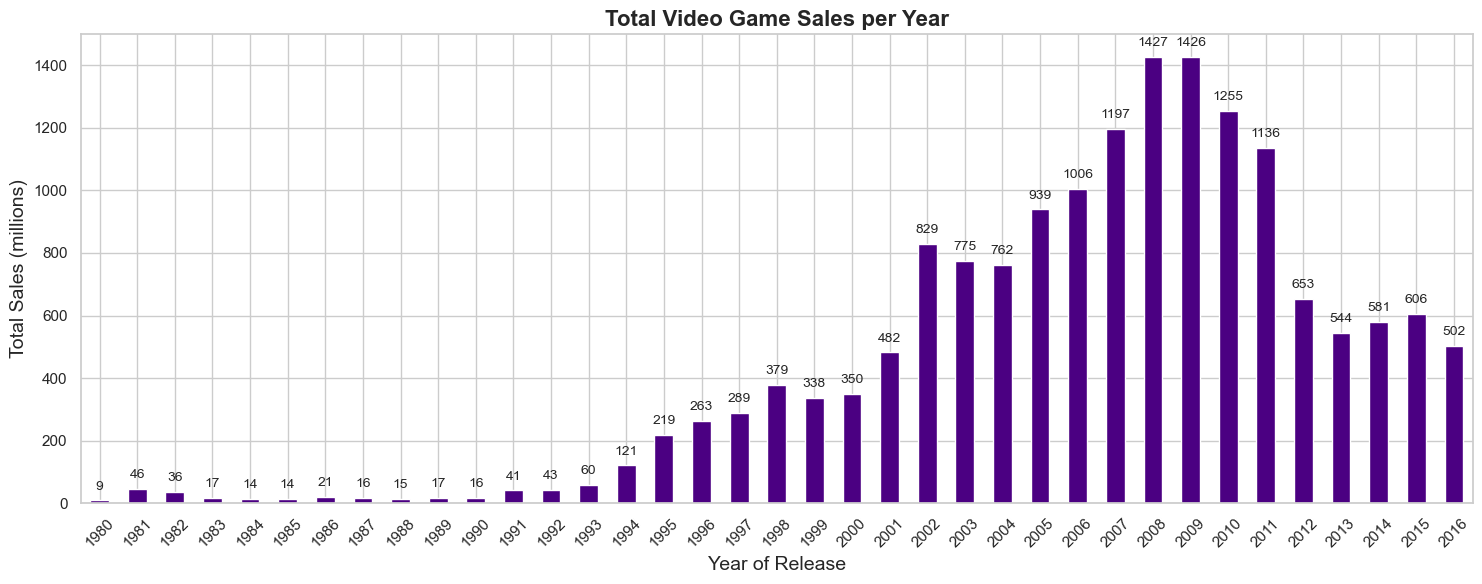

In [264]:
# Total number of video games released by year 
game_counts_per_year = games.groupby('year_of_release').size()
 
# Seaborn grid
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(15, 6))
barplot = game_counts_per_year.plot(
    kind="bar", 
    color="indigo", 
    edgecolor="white"
)

# Titles and labels
plt.title('Total Video Game Sales per Year', fontsize=16, fontweight='bold')
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.xticks(rotation=45)


# Add value labels on the bars
for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=10
    )

# Show the plot
plt.tight_layout()
plt.show()

**¿Son significativos los cambios en las ventas de cada año?**

Las dos primeras décadas tuvieron ventas muy bajas, lo que se puede ver claramente, ya que desde 2002 las ventas aumentaron el doble con respecto al año anterior. Luego, entre 2002 y 2011, se registró el mayor número de ventas de la historia, pero desde entonces las ventas han disminuido.

Vamos a explorar más:

1. **Años Tempranos (1980-1995)**:
   - Las ventas fueron bajas durante este período, ya que el mercado no estaba consolidado.
   - Desde 1990, las ventas aumentaron ligeramente, pero no lo suficiente como para considerarse un pico.

2. **Período de Crecimiento (1995-2002)**:
   - En 1995, las ventas totales fueron casi el doble que el año anterior.
   - Las ventas crecieron de manera continua cada año, alcanzando un nivel considerable en 2002.

3. **Años de Máximo Crecimiento (2002-2010)**:
   - Las ventas aumentaron significativamente, alcanzando su punto máximo en 2008 y 2009, con ventas superiores a los 1,400 millones de dólares cada año.
   - El auge en 2008-2009 podría estar asociado con la alta demanda global de videojuegos durante este período, cuando los videojuegos se convirtieron en una forma de entretenimiento de masas.

4. **Período de Declive (2010-2016)**:
   - Desde 2012 se observa una disminución notable en las ventas, siendo la caída más significativa entre 2011 y 2012. Esto podría estar relacionado directamente con la introducción de los teléfonos inteligentes.
   - Aunque las ventas aumentaron ligeramente alrededor de 2014-2015, no volvieron a los niveles alcanzados durante los años de máximo crecimiento.

**Conclusión:**  
Lo que necesitamos abordar es cómo adaptarnos a las cambiantes preferencias de los usuarios de la industria de los videojuegos y la introducción de los teléfonos inteligentes.

### 6.2 Ventas por plataforma

#### 6.2.1 Veamos cómo variaron las ventas totales de videojuegos por plataforma

Platforms with most sales:
   platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78


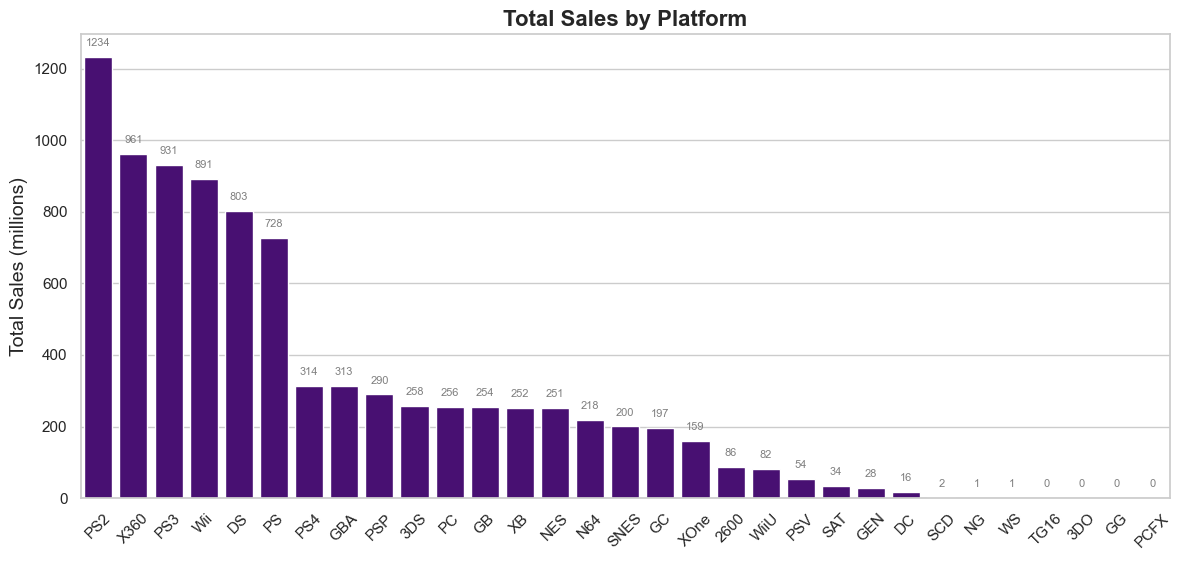

In [265]:
# Group by 'platform' and sum 'total_sales'
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort the results in descending order
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Results
print('Platforms with most sales:')
print(platform_sales.head()) # top 5 sales

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='total_sales', data=platform_sales, color="indigo", edgecolor="white")

# Titles and labels
plt.title('Total Sales by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platform', color='white', fontsize=14)
plt.ylabel('Total Sales (millions)', fontsize=14)
plt.xticks(rotation=45)

# Add value labels on the bars
for p in plt.gca().patches:
    plt.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=8,
        color='gray'
    )

# Show the plot
plt.tight_layout()
plt.show()

Las 5 plataformas con más ventas en millones son:  
- **'PS2'** total: 1233.56 millones.  
- **'X360'** total: 961.24 millones.  
- **'PS3'** total: 931.34 millones.  
- **'Wii'** total: 891.18 millones.  
- **'DS'** total: 802.78 millones.  

En la parte inferior de la lista, se observa que plataformas como **SCD**, **NG**, **WS**, **TG16**, **3DO**, **GG**, y **PCFX** tienen menos de 2 millones de ventas en total. Debido al período de análisis, se puede inferir que algunas de estas plataformas podrían haber sido de los años 80. Esto se discutirá más adelante. 

#### 6.2.2.  Las cinco primeras plataformas en ventas de videojuegos

Las 5 primeras plataformas en ventas totales y su distribución por años.

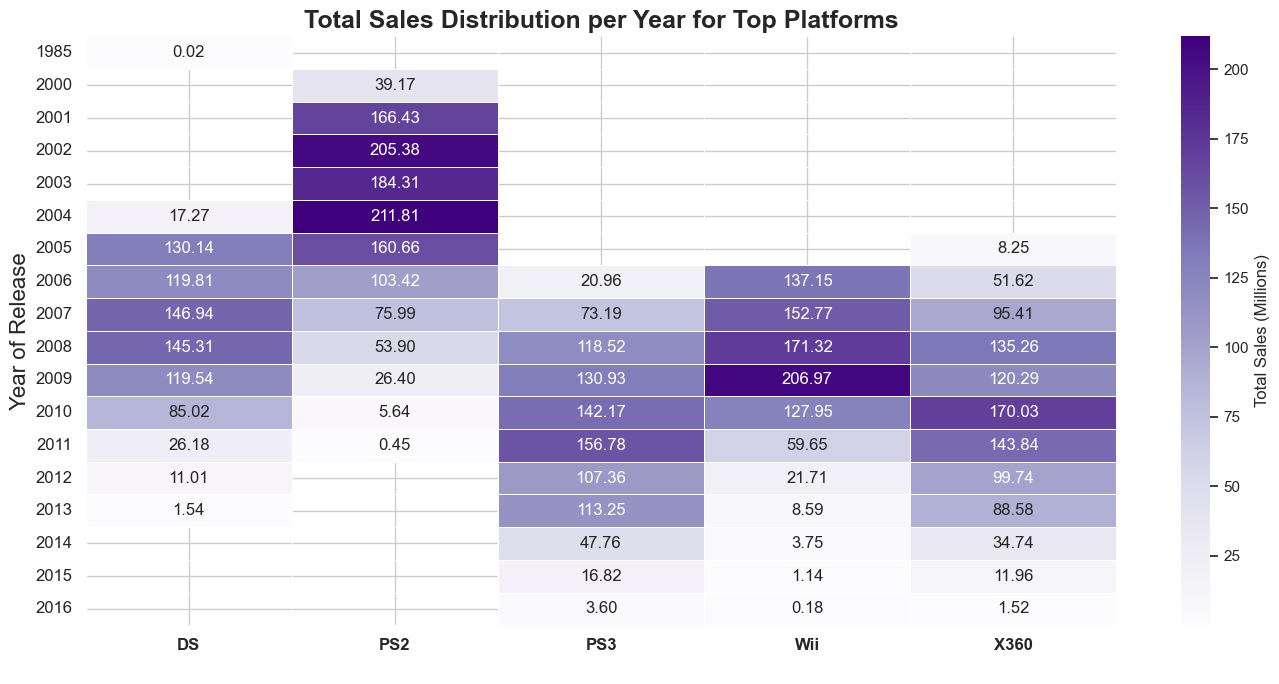

In [266]:
# List of platforms with the highest total sales
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Filter the Games DataFrame for these platforms and exclude rows where 'total_sales' is 0
filtered_games = games[(games['platform'].isin(top_platforms)) & (games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing the 'total_sales'
yearly_distribution_5 = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(14, 7))
sns.heatmap(yearly_distribution_5.replace(0, np.nan), cmap='Purples', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})


# Titles and labels
plt.title('Total Sales Distribution per Year for Top Platforms', fontsize=18, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(fontsize=12, fontweight='bold') 
plt.yticks(fontsize=12)  

# Show the plot
plt.tight_layout()  
plt.show()


**El gráfico ilustra la distribución de ventas totales (en millones) para las principales plataformas de videojuegos: DS, PS2, PS3, Wii y X360 a lo largo de los años.**

**PS2 (2000-2011)**:
   - Lanzada en 2000, la PS2 alcanzó su pico de ventas entre 2002 y 2004, con las ventas más altas registradas en 2004.
   - Las ventas comenzaron a disminuir después de 2005, pero siguieron siendo significativas hasta las últimas ventas registradas en 2011.

**DS (2004-2013)**:
   - La DS experimentó un rápido aumento en las ventas a partir de 2005, alcanzando un pico entre 2007 y 2009.
   - Las ventas comenzaron a declinar en 2008 a medida que entraban al mercado nuevas plataformas de juegos.

**PS3 (2006-2016)**:
   - Las ventas de la PS3 comenzaron a crecer en 2006, alcanzando su pico alrededor de 2008-2009.
   - A continuación, siguió una disminución gradual, reflejando el envejecimiento de la consola y la competencia de sistemas más nuevos.

**Wii (2006-2016)**:
   - La Wii ganó popularidad inmediatamente tras su lanzamiento en 2006, alcanzando su pico entre 2006 y 2009.
   - Su atractivo fue impulsado por el control de movimiento y su alcance a una audiencia amplia.
   - Las ventas cayeron abruptamente a partir de 2012 con la llegada de nuevas consolas.

**X360 (2005-2016)**:
   - El crecimiento de las ventas comenzó en 2005, mostrando una tendencia ascendente continua hasta alcanzar su pico alrededor de 2010.
   - Desde 2012 en adelante, las ventas disminuyeron debido a la llegada de nuevas generaciones de consolas.

**Resumen**:
- Cada consola experimentó un período de ventas pico de aproximadamente 3-5 años antes de una disminución, lo que a menudo coincidió con el lanzamiento de nuevos modelos o consolas competidoras.
- La PS2 tuvo el pico sostenido más largo, demostrando su dominio en el mercado durante sus años de auge.
- La Wii y la DS tuvieron períodos de picos fuertes pero más cortos, correspondientes a su aumento inicial en popularidad.

El gráfico resalta la naturaleza cíclica de la industria de las consolas de videojuegos, caracterizada por nuevos lanzamientos, fases de ventas máximas y eventual declive a medida que las plataformas envejecen y surgen nuevas opciones disponibles.

#### 6.2.3 Ciclos de las plataformas

¿Cuánto suelen tardar en aparecer nuevas plataformas y desaparecer las antiguas?

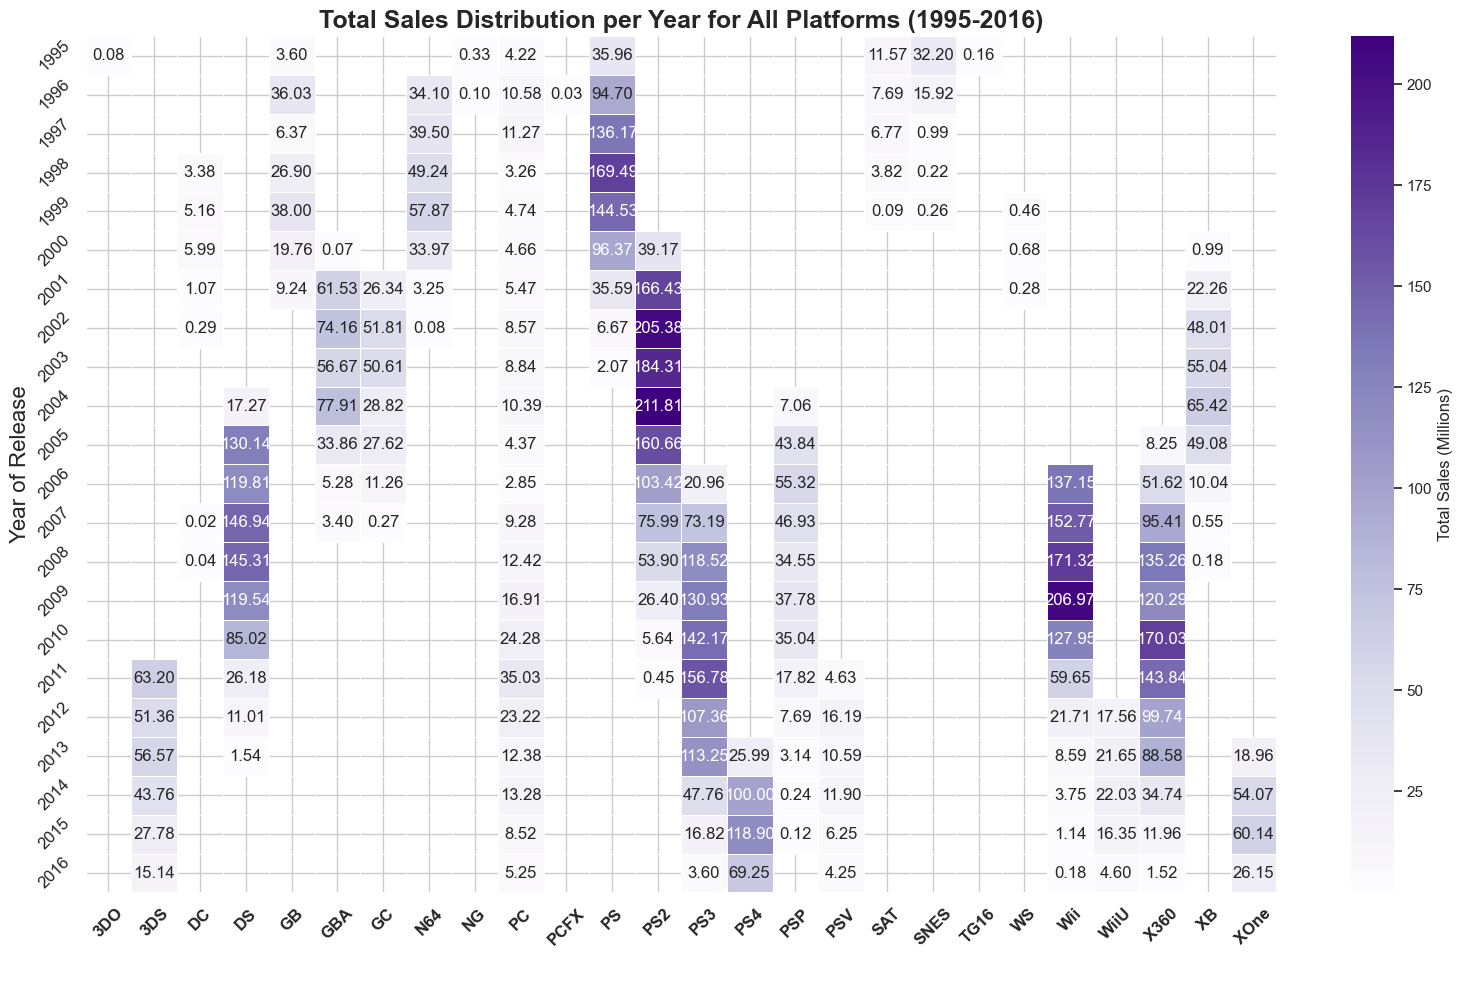

In [267]:
# Filter the data to include only the years from the Growth Period (1995-2002) until the Decline Period (2010-2016),
# and exclude rows where 'total_sales' is 0
filtered_games = games[(games['year_of_release'] >= 1995) & 
                       (games['year_of_release'] <= 2016) & 
                       (games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_distribution_all = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a heatmap using Seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_distribution_all, cmap='Purples', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales Distribution per Year for All Platforms (1995-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**Plataformas seleccionadas para estudios complementarios**
- 3DS
- DS
- GBA
- GC
- N64
- PS
- PC
- PS2
- PS3
- PS4
- PSP
- PSV
- Wii
- WiiU
- X360
- XB
- XOne

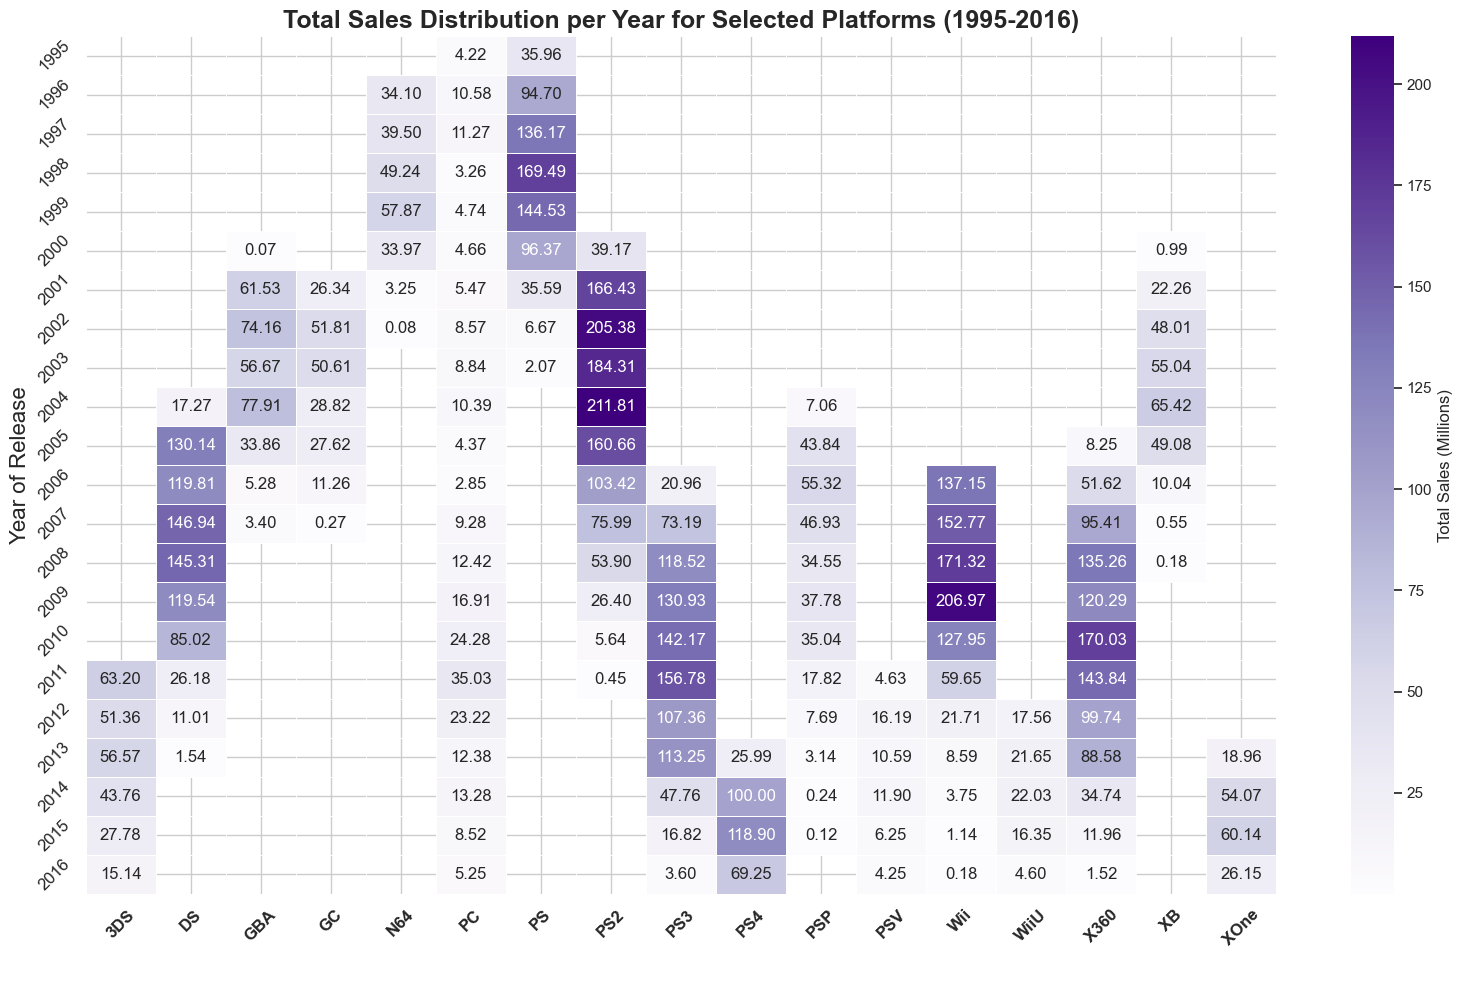

In [268]:
# Selected platforms
selected_platforms = ['3DS', 'DS', 'GBA', 'GC', 'N64', 'PS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']

# Filter the data to include only the years from the Growth Period (1995-2002) until the Decline Period (2010-2016)
filtered_games = games[(games['year_of_release'] >= 1995) & (games['year_of_release'] <= 2016)]

# Further filter the data to include only the selected platforms and exclude rows where 'total_sales' is 0
filtered_games = filtered_games[(filtered_games['platform'].isin(selected_platforms)) & (filtered_games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_distribution_selected = filtered_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Create a heatmap using Seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_distribution_selected, cmap='Purples', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales Distribution per Year for Selected Platforms (1995-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**¿Cuánto tiempo suele tardar la aparición de nuevas plataformas y la desaparición de las viejas?**

**Vida útil de las plataformas:**

1. **3DS**: 2011 - 2016 → **6 años**  
2. **DS**: 2004 - 2013 → **10 años**  
3. **GBA (Game Boy Advance)**: 2001 - 2008 → **8 años**  
4. **GC (GameCube)**: 2001 - 2007 → **7 años**  
5. **N64 (Nintendo 64)**: 1996 - 2002 → **7 años**  
6. **PC**: 2001 - 2016 → **16 años**  
7. **PS (PlayStation 1)**: 1995 - 2004 → **10 años**  
8. **PS2**: 2000 - 2013 → **14 años**  
9. **PS3**: 2006 - 2015 → **10 años**  
10. **PS4**: 2013 - 2016 → **4 años**  
11. **PSP**: 2004 - 2014 → **11 años**  
12. **PSV**: 2011 - 2016 → **11 años**  
13. **Wii**: 2006 - 2016 → **11 años**  
14. **WiiU**: 2012 - 2016 → **5 años**  
15. **XB (Xbox)**: 2001 - 2008 → **8 años**  
16. **X360 (Xbox 360)**: 2005 - 2015 → **11 años**  
17. **XOne (Xbox One)**: 2013 - 2016 → **4 años**

Las nuevas consolas o plataformas generalmente salen cada **5 a 7 años**.

**Resultados**:

1. **Generaciones de consolas**: Las consolas de videojuegos salen en oleadas, o **generaciones**, con nuevos modelos lanzándose cada **5 a 7 años**. Cada nueva consola a menudo se superpone con la anterior. Por ejemplo:
   - Los modelos **PlayStation** (PS, PS2, PS3, PS4) y las consolas **Xbox** (Xbox, Xbox 360, Xbox One) tuvieron algunos años en los que dos estaban a la venta al mismo tiempo.
   - Aunque la **PS2** fue muy popular, las personas comenzaron a cambiarse a la **PS3** cuando salió, y luego a la **PS4**.

2. **Ciclo de vida de las consolas**: La mayoría de las consolas alcanzan su pico de popularidad unos años después de su lanzamiento y luego disminuyen a medida que salen nuevas. La **PS2**, por ejemplo, estuvo en el mercado durante mucho tiempo, 14 años, porque siguió vendiendo bien incluso después de que se lanzaran consolas más nuevas. La **Wii** y la **DS** también tuvieron una vida larga porque se mantuvieron populares durante más de 10 años.

3. **Consolas portátiles vs. consolas de sobremesa**: Los dispositivos portátiles como **GBA**, **DS** y **PSP** tienen una vida útil más corta porque salen modelos nuevos con más frecuencia (como el DS reemplazando al GBA).

4. **Las ventas de PC son diferentes**: A diferencia de las consolas, los **juegos de PC** no están ligados a un modelo específico. Los PCs simplemente se actualizan, por lo que tienen ventas constantes a lo largo del tiempo, en lugar de aumentar y disminuir con cada generación de consolas.

5. **Períodos de transición**: Cuando sale una nueva consola, las personas no cambian de inmediato. Por ejemplo, la **PS3** y la **Xbox 360** siguieron vendiéndose bien incluso después de que se lanzaron la **PS4** y la **Xbox One**. La gente toma tiempo para adoptar nuevas consolas.

6. **Plataformas competidoras**: Algunas consolas, como la **PS3** y la **Xbox 360**, compiten directamente y tienen una vida útil y períodos de popularidad similares. Alcanzaron su pico aproximadamente al mismo tiempo porque ofrecían experiencias similares.

7. **Favoritas de larga duración**: Algunas consolas, como la **PS2**, la **Wii** y la **DS**, se convirtieron en clásicas. Se mantuvieron populares incluso cuando se lanzaron consolas más nuevas.

Cada plataforma tiene una vida útil de **6-10 años**, con picos de popularidad seguidos de un descenso gradual. Se superponen con nuevos modelos, tienen períodos en los que las personas están cambiando, y algunas permanecen populares más tiempo que otras.

En general, **las plataformas nuevas se lanzan cada 5 a 7 años**, y las **plataformas antiguas disminuyen 5-6 años** después de la aparición de una nueva. Este patrón crea una superposición donde tanto plataformas antiguas como nuevas están activas, dándole tiempo a los jugadores para hacer la transición.

### 6.3 El futuro de los videojuegos (2017)
Análisis de los datos para la campaña del próximo año.
- Identificación de las plataformas más vendidas. 

#### 6.3.1 Plataformas que más venden

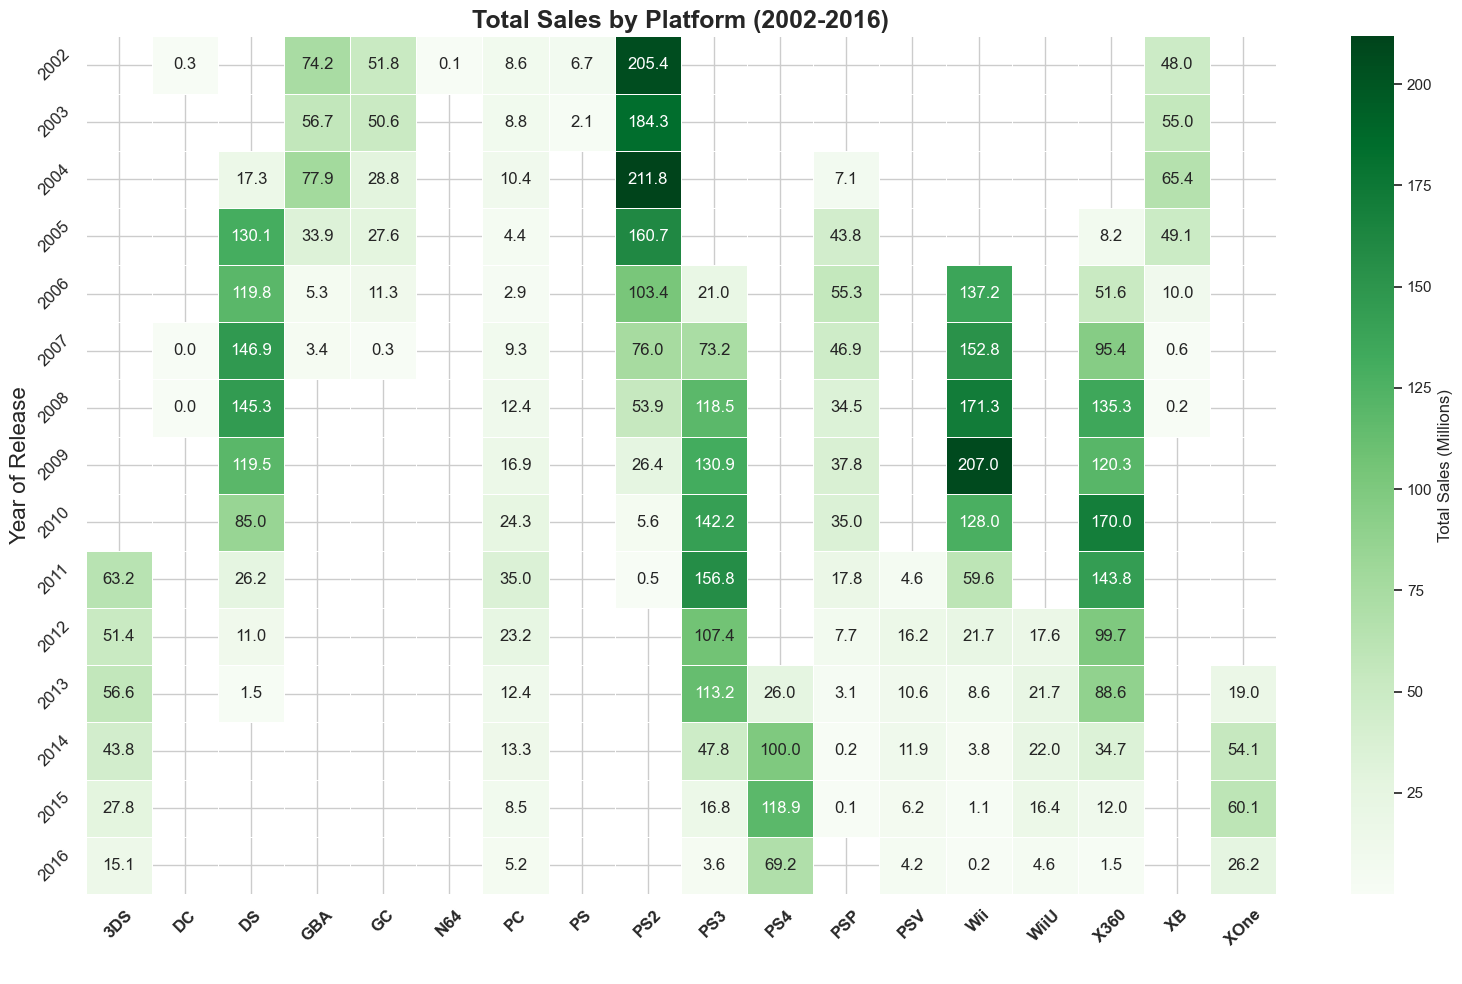

In [269]:
# Filter data for Peak Years (2002-2010) and Decline Period (2010-2016), excluding rows with total_sales == 0
most_used_platforms = games[(games['year_of_release'] >= 2002) & 
                            (games['year_of_release'] <= 2016) & 
                            (games['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_platform_sales = most_used_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_platform_sales, cmap='Greens', annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales by Platform (2002-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**Resultados**:

1. **PS2, DS y Wii**: Estas plataformas tuvieron ventas muy fuertes en su apogeo:
   - La **PS2** vio altas ventas desde 2002 hasta 2006.
   - La **DS** tuvo un pico significativo alrededor de 2008 y 2009.
   - La **Wii** alcanzó su pico de ventas en 2009, con la celda de color verde más oscuro mostrando que fue la más alta para ese año.

2. **PS3 y Xbox 360**: Ambas plataformas vieron altas ventas a fines de los 2000 y principios de los 2010:
   - La **PS3** tuvo sus mayores ventas alrededor de 2009-2011.
   - La **Xbox 360** alcanzó su pico alrededor de 2009 y mantuvo buenas ventas hasta alrededor de 2013.
   - Son las plataformas más vendidas en los últimos años.

3. **PS4 y 3DS**: Estas plataformas tuvieron un buen desempeño a principios y mediados de la década de 2010:
   - La **PS4** tuvo fuertes ventas desde 2014, con su pico en 2015.
   - La **3DS** fue popular a principios de los 2010, especialmente en 2011 y 2012.

4. **Otras plataformas**: Consolas como **PC**, **PSV** y **WiiU** generalmente muestran colores más claros, indicando ventas más bajas en comparación con las plataformas más populares.
   - La **PC** y la **PSV** tuvieron pocas pero constantes ventas a lo largo de los años.

**Declive a lo largo del tiempo**: Para 2016, las ventas cayeron en la mayoría de las plataformas, probablemente debido a la llegada de tecnología más nueva y el lanzamiento de consolas de nueva generación.

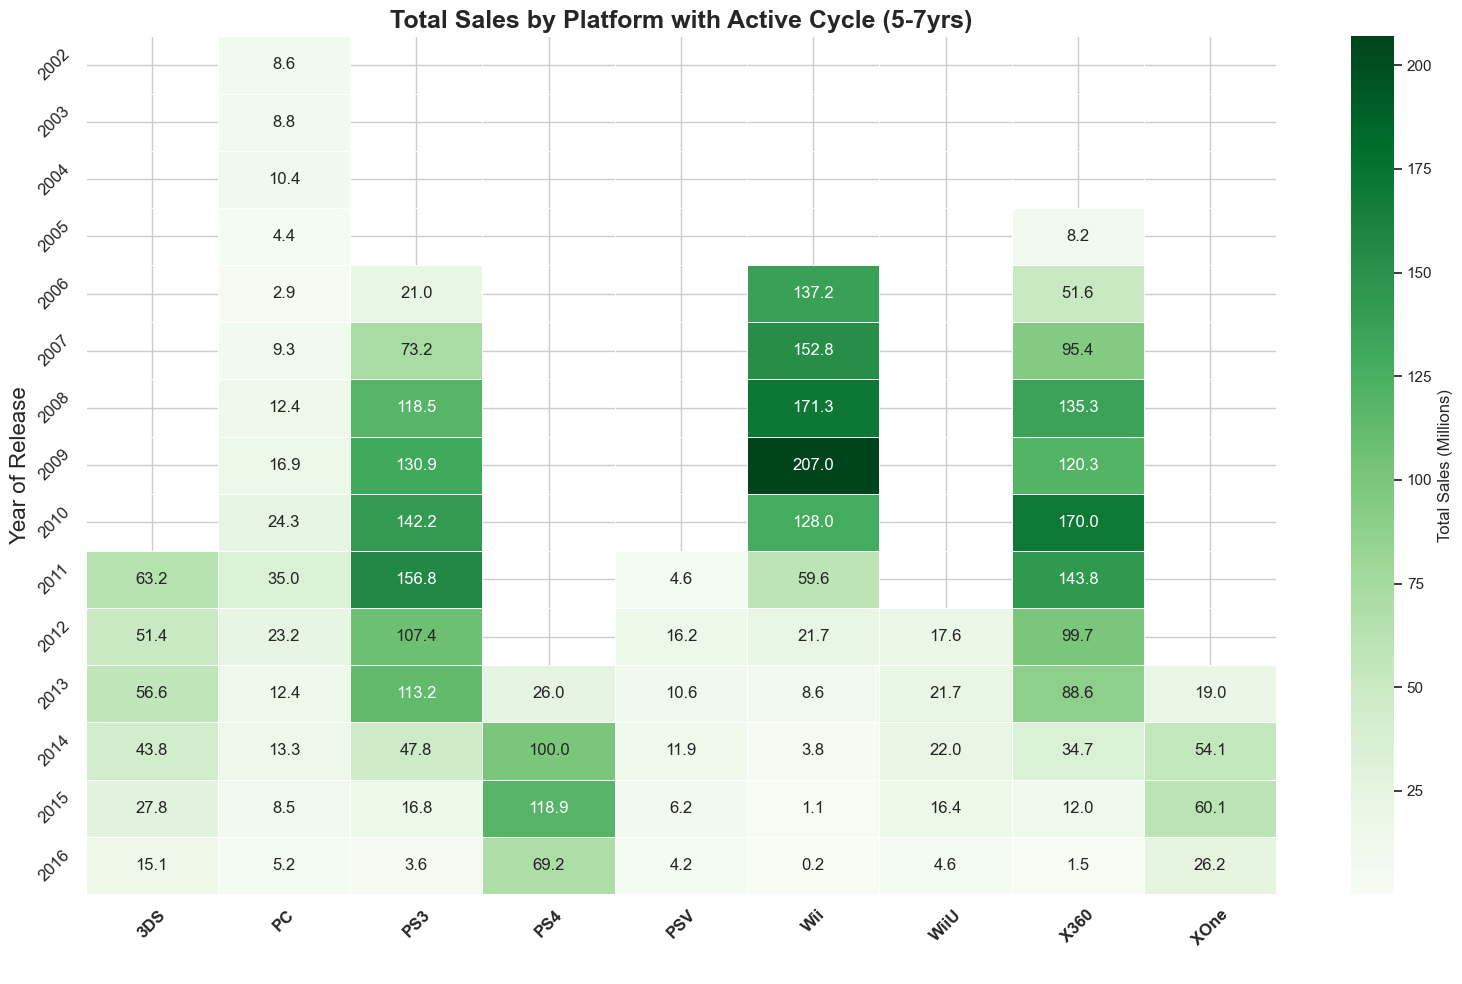

In [270]:
# Filter data for top-selling platforms from 2009 to 2016, ensuring platforms have sales in 2016 and excluding zero sales
platforms_with_sales_2016 = most_used_platforms[most_used_platforms['year_of_release'] == 2016]['platform'].unique()
most_used_platforms = most_used_platforms[(most_used_platforms['platform'].isin(platforms_with_sales_2016)) & 
                                          (most_used_platforms['total_sales'] != 0)]

# Group by 'year_of_release' and 'platform', summing 'total_sales'
yearly_platform_sales = most_used_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(yearly_platform_sales, cmap='Greens', annot=True, fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Total Sales (Millions)'})

# Titles and labels
plt.title('Total Sales by Platform with Active Cycle (5-7yrs)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', fontsize=16, color='white')
plt.ylabel('Year of Release', fontsize=16)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')  
plt.yticks(rotation=45, fontsize=12) 
# Show the plot
plt.tight_layout() 
plt.show()

**Resultados**:

- **PS3** y **Wii** tuvieron ventas muy altas en los primeros años, especialmente alrededor de 2009 y 2010. Ahora, **Wii** está al final de su ciclo activo.
- La plataforma **PS4** tuvo un inicio sólido, mostrando fuertes ventas en 2014 y 2015.
- Las ventas de **Xbox 360** (X360) alcanzaron su pico alrededor de 2009 y luego disminuyeron gradualmente.
- **Nintendo 3DS (3DS)** tuvo buenas ventas en sus primeros años (alrededor de 2011 y 2012), pero ahora está al final de su ciclo activo.
- **PC** y **PSV** tuvieron ventas generalmente más bajas en comparación con las plataformas de consolas como PS3, PS4 y Wii.

Para 2016, las ventas disminuyeron en la mayoría de las plataformas, probablemente debido a la llegada de consolas más nuevas y la obsolescencia de las plataformas más antiguas.

**Analicemos las ventas totales desde 2012, (una mitad del ciclo de vida hacia atrás para descartar plataformas que han terminado su ciclo) para ver qué plataformas son las líderes en ventas.**

In [271]:
# Platforms that ended their life cycle to between 2009-2016 

# Filter data for the years of interest (2009-2016)
most_used_platforms = games[(games['year_of_release'] >= 2009) & (games['year_of_release'] <= 2016)]

# Identify platforms with sales in 2016
platforms_with_sales_2016 = most_used_platforms[most_used_platforms['year_of_release'] == 2016]['platform'].unique()

# Identify platforms without sales in 2016
platforms_without_sales_2016 = most_used_platforms[~most_used_platforms['platform'].isin(platforms_with_sales_2016)]['platform'].unique()

# Convert to list
platforms_without_sales_2016 = list(platforms_without_sales_2016)

# Results
print("Platforms that ended their life cycle prior to 2016:", platforms_without_sales_2016)

Platforms that ended their life cycle prior to 2016: ['DS', 'PSP', 'PS2']


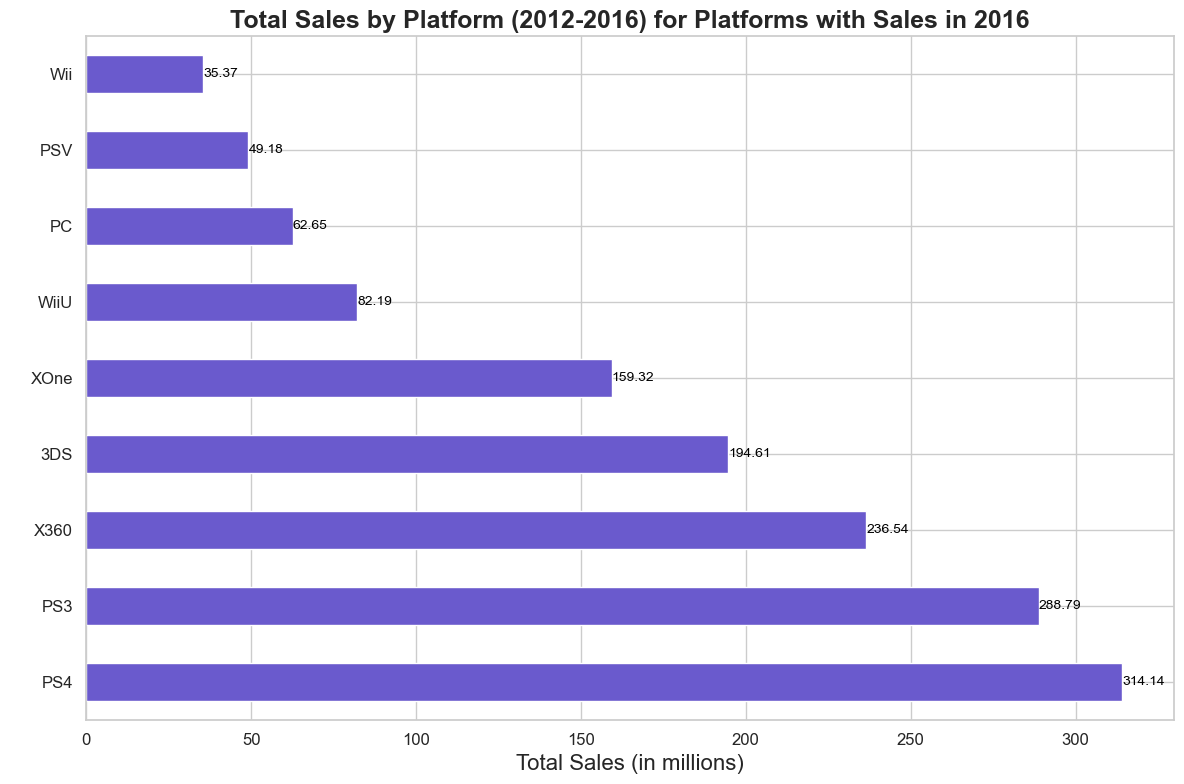

In [272]:
# Filter data 2012 - 2016 
most_used_platforms = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Further filter to include only platforms with sales in 2016
platforms_with_sales_2016 = most_used_platforms[most_used_platforms['year_of_release'] == 2016]['platform'].unique()
most_used_platforms = most_used_platforms[most_used_platforms['platform'].isin(platforms_with_sales_2016)]

# Group by 'platform' and sum 'total_sales'
platform_sales = most_used_platforms.groupby('platform')['total_sales'].sum()

# Sort platforms by total sales in descending order
platform_sales = platform_sales.sort_values(ascending=False)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
platform_sales.plot(kind='barh',  color="slateblue", edgecolor="white")

# Set the style of the seaborn grid
sns.set(style="whitegrid")

# Adding data labels to each bar
for index, value in enumerate(platform_sales):
    plt.text(value, index, f'{value:.2f}', fontsize=10, color='black', va='center')

# Titles and labels
plt.title('Total Sales by Platform (2012-2016) for Platforms with Sales in 2016', fontsize=18, fontweight='bold')
plt.xlabel('Total Sales (in millions)', fontsize=16)
plt.ylabel('Platform', color='white')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout

# Show  plot
plt.show()

**Resultados**:

1. **PS4** tiene las ventas más altas entre estas plataformas, alcanzando más de 300 millones de unidades vendidas.
2. **PS3** y **Xbox 360** también tuvieron altas ventas, alrededor de 289 millones y 237 millones, respectivamente. Estas plataformas fueron muy populares durante este período, aunque ligeramente por debajo de PS4.
3. **3DS** también tuvo un buen rendimiento, con casi 195 millones de unidades vendidas.
4. **Xbox One** tuvo buenas ventas, alrededor de 159 millones.
5. **Wii U** y **PC** tuvieron ventas moderadas, con Wii U en 82 millones y PC en aproximadamente 63 millones.
6. **Wii** y **PSV** tuvieron las ventas más bajas, con Wii en 35 millones y PSV en 49 millones.

**Conclusiones**: **PS4** dominó las ventas en este período, seguida de un fuerte desempeño de **PS3**, **Xbox 360** y **3DS**. Plataformas como Wii y PSV tuvieron ventas mucho más bajas en comparación. Podemos ver que los principales competidores son **PSP3/4** y **X360**.

#### 6.3.2 Diagrama de caja de ventas totales por las plataformas más vendidas

- ¿Son significativas las diferencias en las ventas?
- ¿Qué pasa con las ventas promedio entre múltiples plataformas?

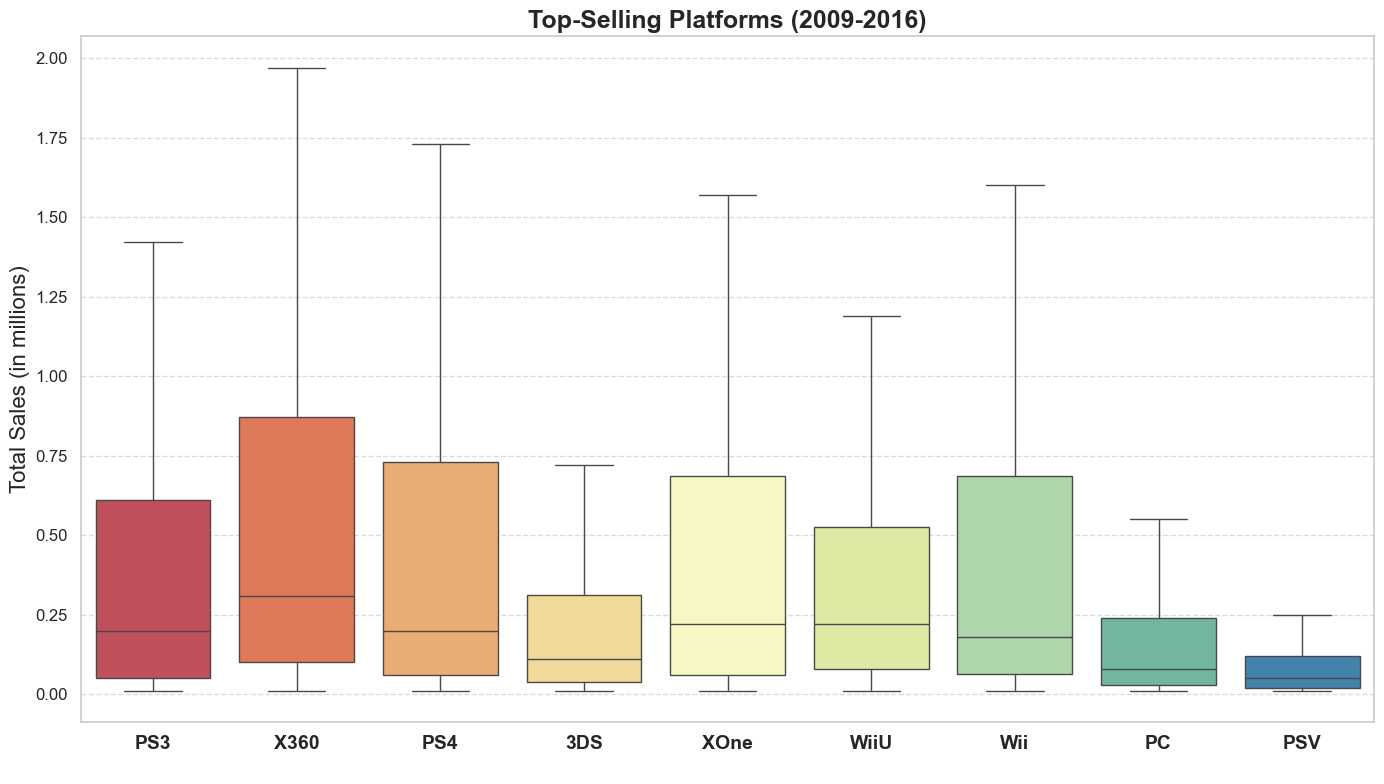

In [273]:
# Box plot

# Filter the data for platforms with sales in 2016 within the period of 2009-2016
top_selling_platforms = most_used_platforms[most_used_platforms['platform'].isin(platforms_with_sales_2016)]


# Set up the plot size and style
plt.figure(figsize=(14, 8))

# Create the box plot
sns.boxplot(x='platform', y='total_sales', data=top_selling_platforms, hue='platform', palette="Spectral", showfliers=False)

# Titles and labels
plt.title('Top-Selling Platforms (2009-2016)', fontsize=18, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('Total Sales (in millions)', fontsize=16)

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()  # Adjust layout 

# Show plot
plt.show()

**Resultados**:

- La mediana de ventas es más alta para **X360**, **PS3**, **PS4** y **XOne**, lo que indica que estas plataformas tuvieron ventas más altas en los últimos 7 años.
- **PSV** y **PC** tienen medianas más bajas y un IQR más comprimido, lo que indica que estas plataformas tuvieron ventas más consistentes pero más bajas.
- **X360** y **PS4** tienen cajas más grandes, lo que muestra un rango más amplio de ventas.
- **X360**, **PS3** y **XOne** muestran rangos más amplios, reflejando algunos años de ventas muy altas.
- **Wii** y **3DS** tienen medianas relativamente más pequeñas y un rango más estrecho, mostrando menos variabilidad en su distribución de ventas.

#### 6.3.3 PS4 VS XOne VS 3DS

Descubriremos cómo se correlacionan las reseñas de usuarios y profesionales, así como las ventas, en las tres plataformas más populares.

A partir de ahora, **los datos** se filtrarán para tomar solo el **período de vida más corto** de una plataforma, que es **5 años**.

In [274]:
#Filter recent data in the DataFrame games, by release date from 2011 onwards
recent_data = games.query('year_of_release >= 2011')
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int64  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     4022 non-null   int64  
 9   user_score       4022 non-null   float64
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 408.5+ KB


##### 6.3.3.1  PS4

**Correlación entre 'user_score' y 'total_sales'**

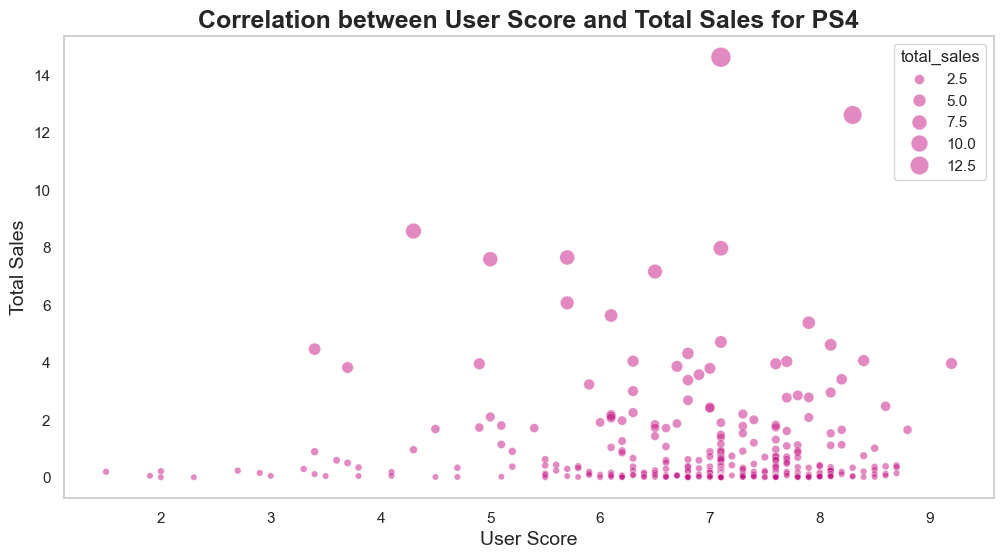

Correlation between user_score and total_sales: -0.05


In [275]:
# Filter the data for the PS4 platform
ps4_games = recent_data[recent_data['platform'] == 'PS4']  

# Calculate correlation between user_score and total_sales
correlation = ps4_games[['user_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='mediumvioletred')

# Titles and labels
plt.title('Correlation between User Score and Total Sales for PS4', fontsize=18, fontweight='bold')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()

print(f'Correlation between user_score and total_sales: {correlation:.2f}')


**Resultados**:  
El coeficiente de correlación de -0.05 entre la Puntuación de Usuario y las Ventas Totales indica una relación negativa muy débil. Esencialmente, no hay una correlación significativa entre la Puntuación de Usuario y las Ventas Totales de los juegos de PS4.

**Correlación entre Critic Score y Total Sales para PS4**

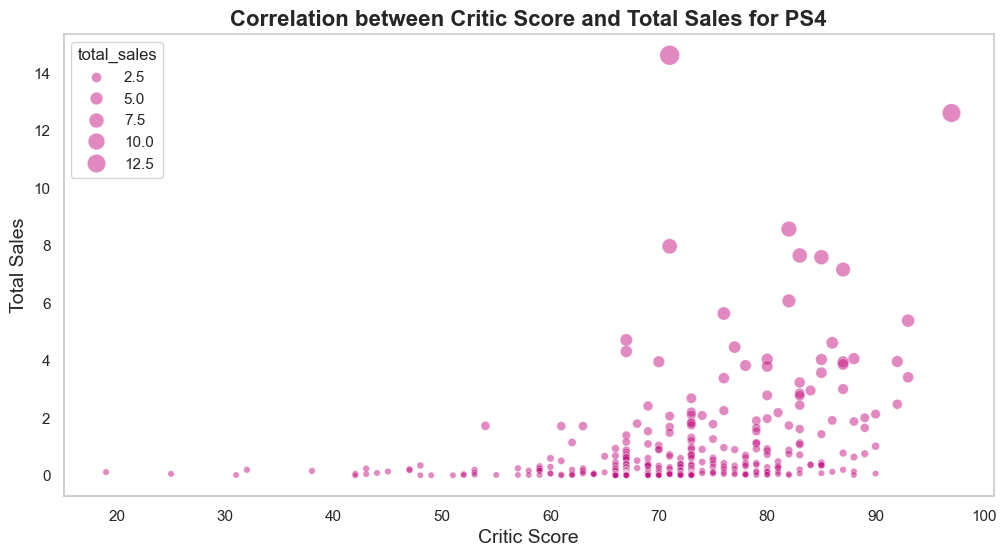

Correlation between critic_score and total_sales: 0.35


In [276]:
# Filter the data for the PS4 platform
ps4_games = recent_data[recent_data['platform'] == 'PS4'] 

# Calculate correlation between critic_score and total_sales.
correlation = ps4_games[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='mediumvioletred')

# Titles and labels
plt.title('Correlation between Critic Score and Total Sales for PS4', fontsize=16, fontweight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between critic_score and total_sales: {correlation:.2f}')

**Resultados**: El coeficiente de correlación de -0.35 sugiere una correlación negativa débil. Esto indica una relación negativa ligeramente más fuerte entre la Puntuación del Crítico y las Ventas Totales en comparación con la Puntuación del Usuario, pero las calificaciones más altas de los críticos no se correlacionan fuertemente con ventas más altas.

##### 6.3.3.2  XOne 

**Correlación entre 'user_score' y 'total_sales'**

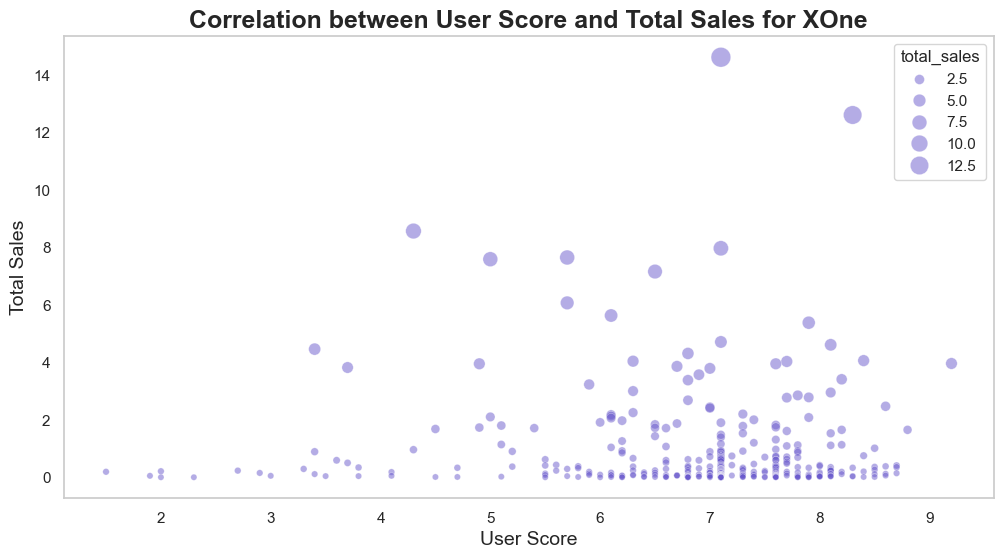

Correlation between user_score and total_sales: -0.09


In [277]:
# Filter the data for the XOne platform
xone_games = recent_data[recent_data['platform'] == 'XOne']  

# Calculate correlation between user_score and total_sales
correlation = xone_games[['user_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='slateblue')

# Titles and labels
plt.title('Correlation between User Score and Total Sales for XOne', fontsize=18, fontweight='bold')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between user_score and total_sales: {correlation:.2f}')


**Resultados**:  
El coeficiente de correlación de -0.09 sugiere una correlación negativa débil, lo que refuerza que la Puntuación de Usuario tiene un impacto mínimo en las Ventas Totales de los juegos de Xbox One.

**Correlación entre 'critic_score' y 'total_sales'**

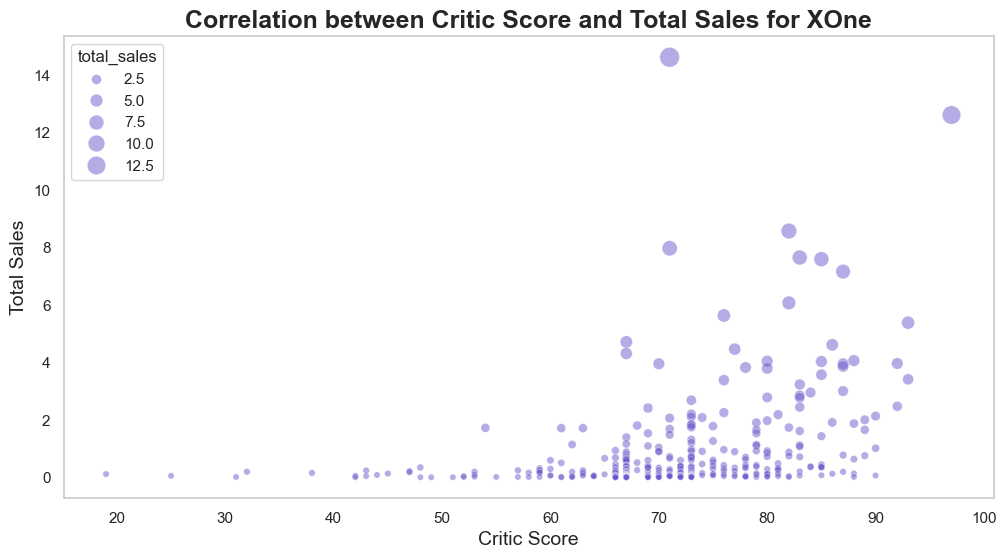

Correlation between critic_score and total_sales: 0.38


In [278]:
# Filter the data for the XOne platform
xone_games = recent_data[recent_data['platform'] == 'XOne']  

# Calculate correlation between critic_score and total_sales
correlation = xone_games[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='slateblue')

# Titles and labels
plt.title('Correlation between Critic Score and Total Sales for XOne', fontsize=18, fontweight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between critic_score and total_sales: {correlation:.2f}')


**Resultados**:  
El coeficiente de correlación de 0.38 sugiere una correlación negativa débil, lo que indica que la Puntuación del Crítico tiene una ligera influencia en las ventas.

##### 6.3.3.3  3DS

**Correlación entre 'user_score' y 'total_sales'**

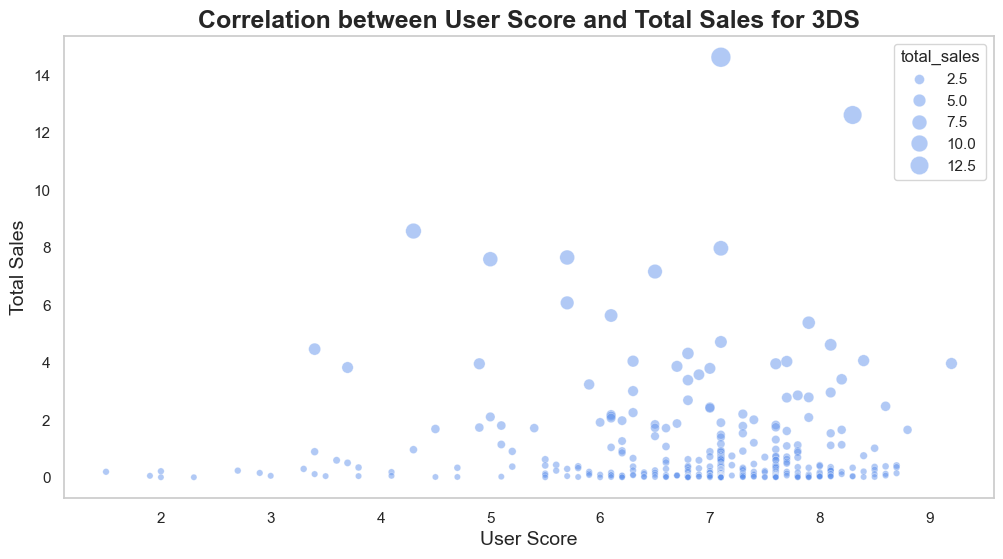

Correlation between user_score and total_sales: 0.16


In [279]:
# Filter the data for the 3DS platform
tds_games = recent_data[recent_data['platform'] == '3DS']  

# Calculate correlation between user_score and total_sales
correlation = tds_games[['user_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='user_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='cornflowerblue')

# Titles and labels
plt.title('Correlation between User Score and Total Sales for 3DS', fontsize=18, fontweight='bold')
plt.xlabel('User Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between user_score and total_sales: {correlation:.2f}')

**Resultados**:  
El coeficiente de correlación de 0.16 indica que la Puntuación de Usuario afecta mínimamente las Ventas Totales de los juegos de Xbox One.

**Correlación entre 'critic_score' y 'total_sales'**

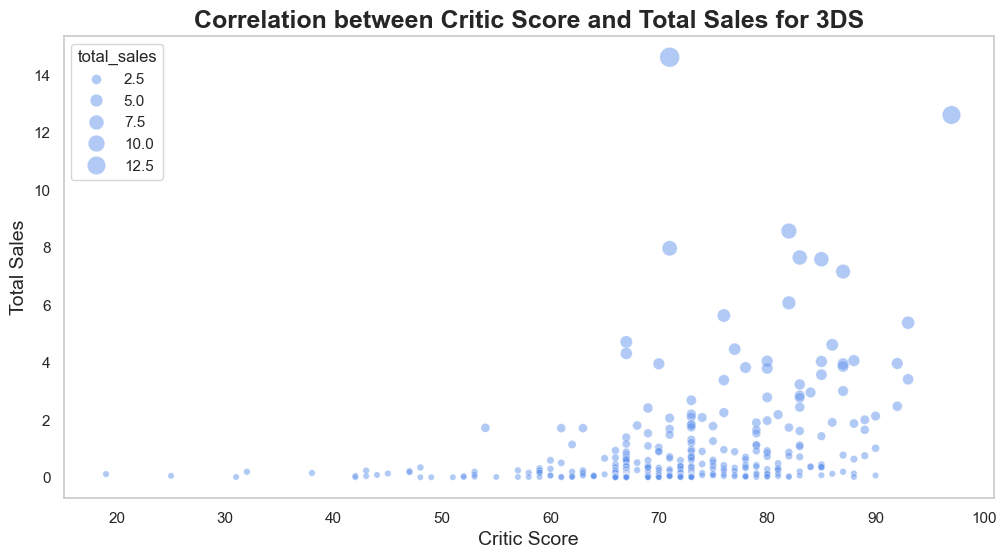

Correlation between user_score and total_sales: 0.26


In [280]:
# Filter the data for the 3DS platform
tds_games = recent_data[recent_data['platform'] == '3DS']  

# Calculate correlation between critic_score and total_sales
correlation = tds_games[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_games, x='critic_score', y='total_sales', size='total_sales', sizes=(20, 200), alpha=0.5, color='cornflowerblue')

# Titles and labels
plt.title('Correlation between Critic Score and Total Sales for 3DS', fontsize=18, fontweight='bold')
plt.xlabel('Critic Score', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()

# Show plot
plt.show()
print(f'Correlation between user_score and total_sales: {correlation:.2f}')

**Resultados**:  
El coeficiente de correlación de 0.26 indica que la Puntuación del Crítico afecta mínimamente las Ventas Totales de los juegos de Xbox One.

#### 6.3.4 Distribución de ventas por género

¿Cuáles son los géneros más rentables?

¿Se pueden generalizar los géneros con ventas altas y bajas?

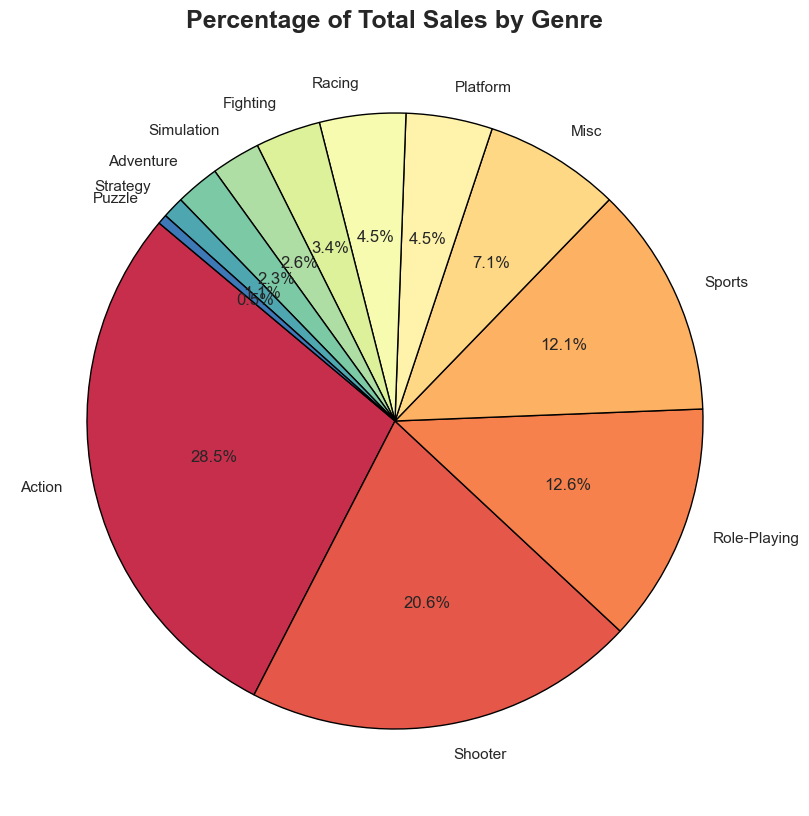

In [281]:
# Group by 'total_sales' and 'genre'
genre_sales = recent_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(genre_sales.values, labels=genre_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Spectral", len(genre_sales)), wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Percentage of Total Sales by Genre', fontsize=18, fontweight='bold')

# Show the plot
plt.show()

**Observaciones**: A nivel global, por ventas totales, los primeros 5 géneros son `Acción`, `Disparos`, `Juegos de Rol`, `Deportes` y `Misceláneos`. Juntos representan el 80.9% de las `Ventas Totales`.

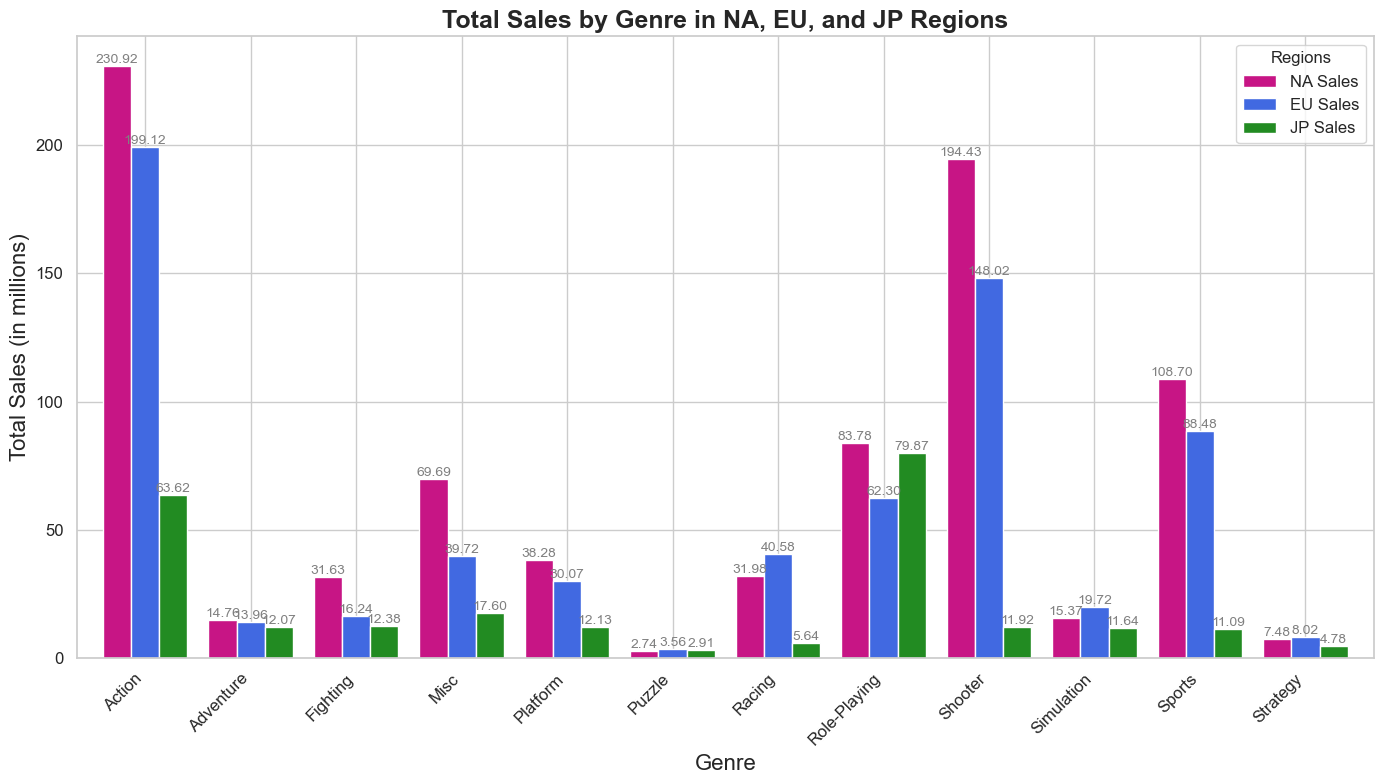

In [282]:
# Group regional sales by 'genre'
region_genre_sales = recent_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Reset the index to convert 'genre' into a column
region_genre_sales = region_genre_sales.reset_index()

# Custom colors for the bars
colors = ['mediumvioletred', 'royalblue', 'forestgreen']

# Create the grouped bar chart
ax = region_genre_sales.plot(
    kind='bar', x='genre', stacked=False, color=colors, edgecolor='white', width=0.8, figsize=(14, 8)
)

# Titles and labels
plt.title('Total Sales by Genre in NA, EU, and JP Regions', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Total Sales (in millions)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'], title="Regions", fontsize=12)

# Display the total on top of each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, height,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='gray'
        )

# Show plot
plt.tight_layout()
plt.show()

**Resultados**

**Géneros Más y Menos Rentables**:

1. **América del Norte:**
   - **Géneros más rentables:** Disparos (194.43 millones), Acción (230.92 millones) y Deportes (108.7 millones).
   - **Géneros con menos ventas:** Estrategia (7.48 millones) y Rompecabezas (2.74 millones).

2. **Europa:**
   - **Géneros más rentables:** Disparos (148.02 millones), Acción (199.12 millones) y Deportes (88.48 millones).
   - **Géneros con menos ventas:** Estrategia (8.02 millones) y Rompecabezas (5.62 millones).

3. **Japón:**
   - **Géneros más rentables:** Juegos de rol (62.3 millones), Acción (63.62 millones) y Lucha (38.28 millones).
   - **Géneros con menos ventas:** Disparos (17.6 millones) y Rompecabezas (2.13 millones).

Los géneros más rentables son **Acción** y **Disparos** en NA y EU, mientras que en JP, el género **Juegos de rol** lidera, seguido de **Acción**.

Los géneros **Rompecabezas** y **Estrategia** tienen las ventas más bajas en todas las regiones, lo que indica un interés generalmente bajo en estos géneros.


## 7. Perfil de usuario por región

### 7.1 Principales Cinco Plataformas

Describe las variaciones en sus cuotas de mercado* de una región a otra.

*La cuota de mercado se calcula dividiendo las ventas totales de un producto o industria por las ventas de una empresa durante el mismo período de tiempo.

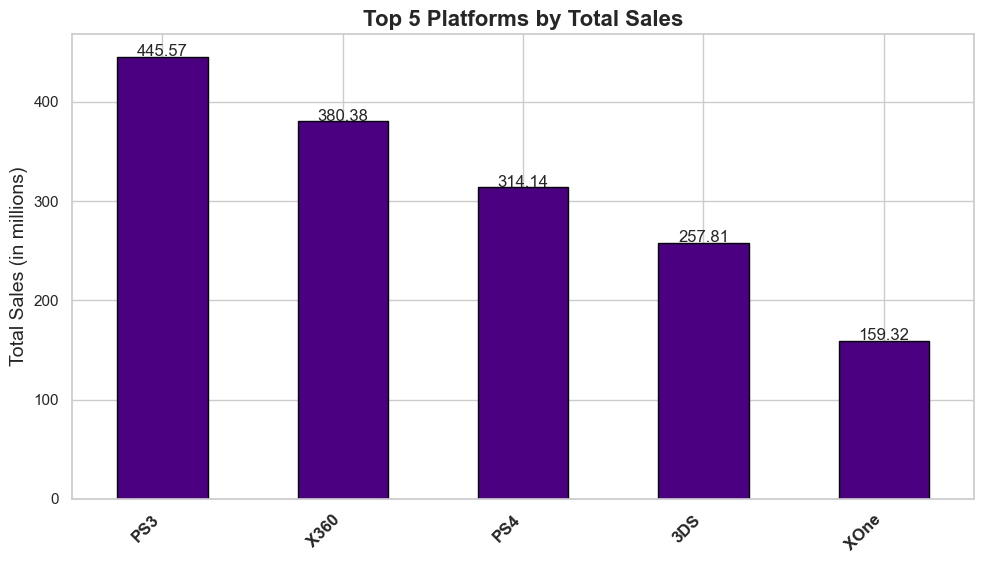

In [283]:
# Calculate the Top 5 'platforms' by 'total_sales'
topfiveplt = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

# Plot the bar chart
plt.figure(figsize=(10, 6))
topfiveplt.plot(kind='bar', color='indigo', edgecolor='black')

# Add titles and labels
plt.title('Top 5 Platforms by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('Total Sales (in millions)', fontsize=14)

# Add data labels on top of each bar
for index, value in enumerate(topfiveplt):
    plt.text(index, value + 0.5, f'{value:.2f}', ha='center', fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

**Resultados**  
A través de todas las regiones, las 5 principales `plataformas` en `ventas_totales` en orden descendente son **PS3**, **x360**, **PS4**, **3DS** y **XOne**.

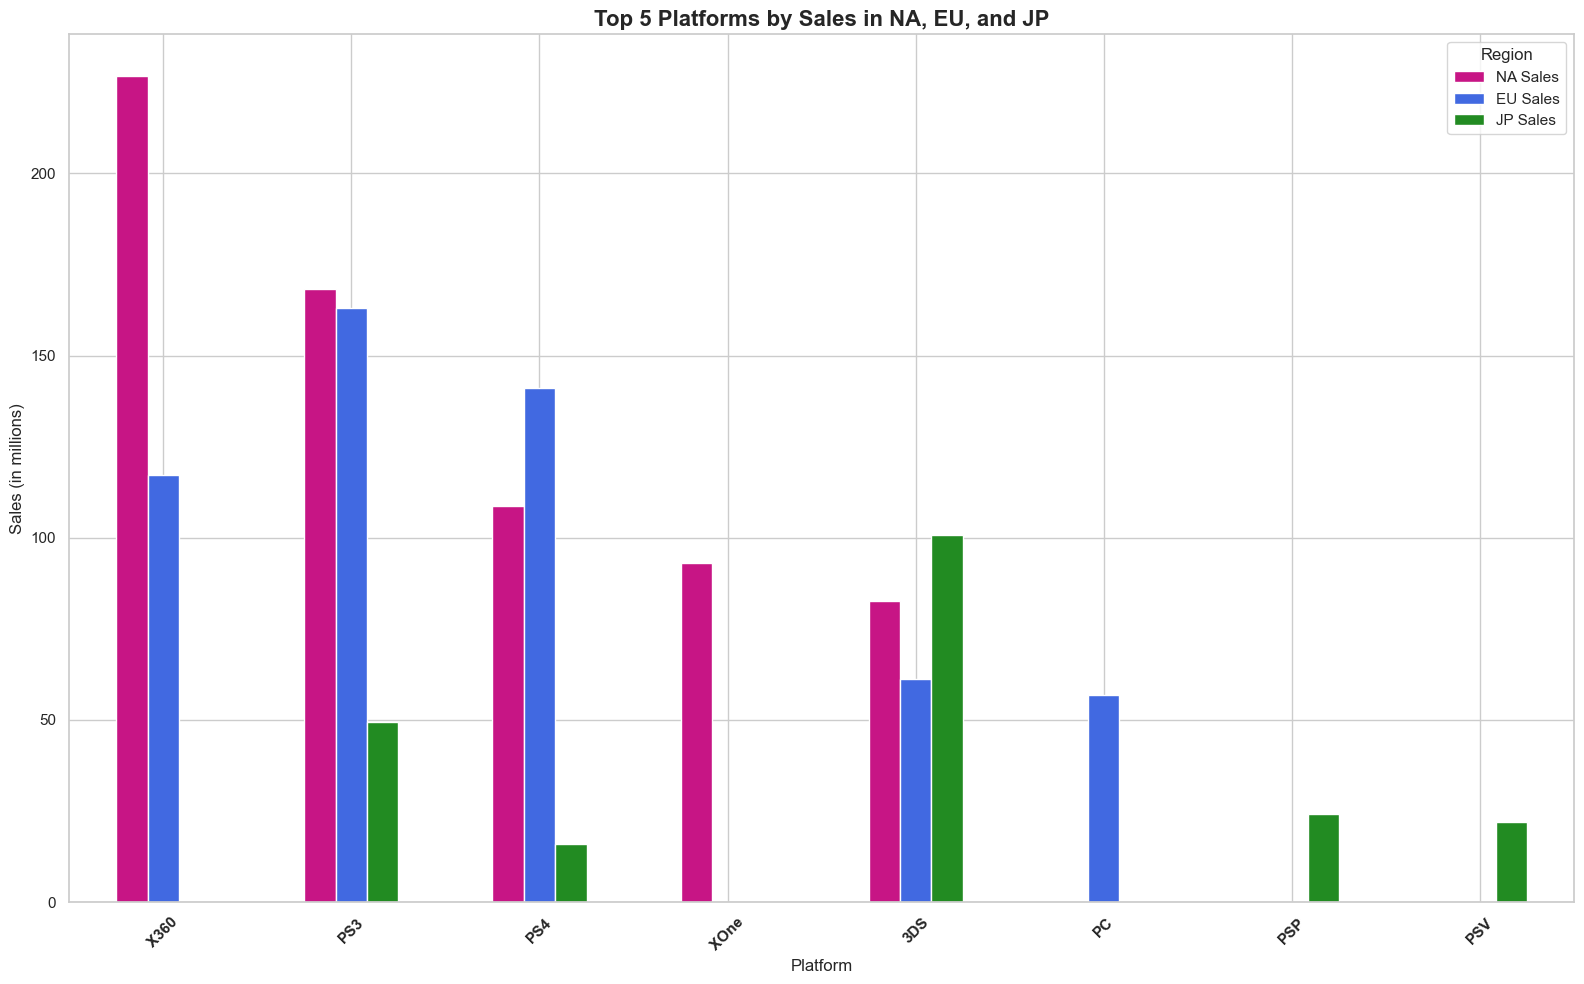

In [284]:
# Top 5 platforms by region

# Group by platform and sum sales by region
platform_sales = recent_data.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

# Get the top 5 platforms with the most sales in each region
top_na_sales = platform_sales.nlargest(5, 'na_sales')
top_eu_sales = platform_sales.nlargest(5, 'eu_sales')
top_jp_sales = platform_sales.nlargest(5, 'jp_sales')

# Combine the top platforms into a single DataFrame
top_platforms = pd.concat([top_na_sales.set_index('platform')['na_sales'], 
                            top_eu_sales.set_index('platform')['eu_sales'], 
                            top_jp_sales.set_index('platform')['jp_sales']], 
                           axis=1).fillna(0)

top_platforms.columns = ['NA Sales', 'EU Sales', 'JP Sales']

# Configure the plot
top_platforms.plot(kind='bar', figsize=(16, 10), color=['mediumvioletred', 'royalblue', 'forestgreen'])

# Set plot title and labels
plt.title('Top 5 Platforms by Sales in NA, EU, and JP', fontsize=16, fontweight='bold')
plt.ylabel('Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45, fontweight='bold')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

**Resultados**

**Plataformas más y menos rentables**:

1. **América del Norte:**
   - **Plataformas más rentables:** X360, PS3, PS4, XOne y 3DS.

2. **Europa:**
   - **Plataformas más rentables:** PS3, PS4, X360, 3DS y PC.

3. **Japón:**
   - **Plataformas más rentables:** 3DS, PS3, PSP, PDV y PS4.

Las plataformas más rentables que tienen en común son **PS3**, **PS4** y **3DS**.

**PC** y **PSV** podrían ser plataformas de interés para un mayor desarrollo a nivel global.

In [285]:
# Market share by region and common platforms in top 5

# Calculate the total income from all sales
total_income = recent_data['total_sales'].sum()

# Define the platforms of interest
platforms = ['PS3', 'X360', 'PS4']

# Initialize a dictionary to store total shares
total_shares = {}

# Print the market share variations for each platform
print('Market Share Variation by Region for Each Platform:')
for platform in platforms:
    print(f"\nPlatform: {platform}")
    
    # Filter the data for the current platform
    recent_data_platform = recent_data[recent_data['platform'] == platform]
    
    # Initialize the total share for the platform
    total_share = 0
    
    for region in ['na_sales', 'eu_sales', 'jp_sales']:
        share = round(recent_data_platform[region].sum() / total_income * 100, 3)
        print(f"{region}: {share}%")
        
        # Add the share to the total share of the platform
        total_share += share
    
    # Store the total share in the dictionary
    total_shares[platform] = total_share

# Sort the platforms by total share and select the top three
top_platforms = sorted(total_shares.items(), key=lambda x: x[1], reverse=True)

# Print the top platforms
print("\nThe top platforms by market share are:")
for platform, share in top_platforms:
    print(f"{platform}: {share}%")

Market Share Variation by Region for Each Platform:

Platform: PS3
na_sales: 8.611%
eu_sales: 8.347%
jp_sales: 2.527%

Platform: X360
na_sales: 11.606%
eu_sales: 5.992%
jp_sales: 0.171%

Platform: PS4
na_sales: 5.565%
eu_sales: 7.22%
jp_sales: 0.817%

The top platforms by market share are:
PS3: 19.485%
X360: 17.769%
PS4: 13.602%


**Preferencias regionales para las plataformas PS3, X360 y PS4**:

1. **América del Norte**: El X360 tiene la mayor cuota de mercado con un 11.606%, seguido por el PS3 con un 8.611%, y en tercer lugar está el PS4 con un 5.565%.
2. **Europa**: El PS4 tiene la mayor cuota de mercado con un 7.22%, seguido por el PS3 con un 8.347%, y en tercer lugar está el X360 con un 5.992%.
3. **Japón**: El PS3 tiene la mayor cuota de mercado con un 2.527%, seguido por el PS4 con un 0.817%, y en tercer lugar está el PS4 con un 0.171%.

Cabe señalar que Japón tiene un consumo ligeramente diferente de las principales plataformas, lo que explica el bajo porcentaje de ventas en este mercado.

**Las principales plataformas por cuota de mercado**:

El **PS3** domina la cuota de mercado global con un 19.485% debido a las altas ventas en América del Norte y Europa.
A continuación, está el **X360** con un 17.769% gracias a las altas ventas en NA.
Finalmente, tenemos el **PS4**, el más nuevo en el mercado, con un 13.602% de cuota de mercado, pero se queda ligeramente atrás debido a sus menores ventas en Japón y América del Norte en comparación con otras plataformas.

### 7.2 Los cinco géneros principales.

Explicando sus diferencias.

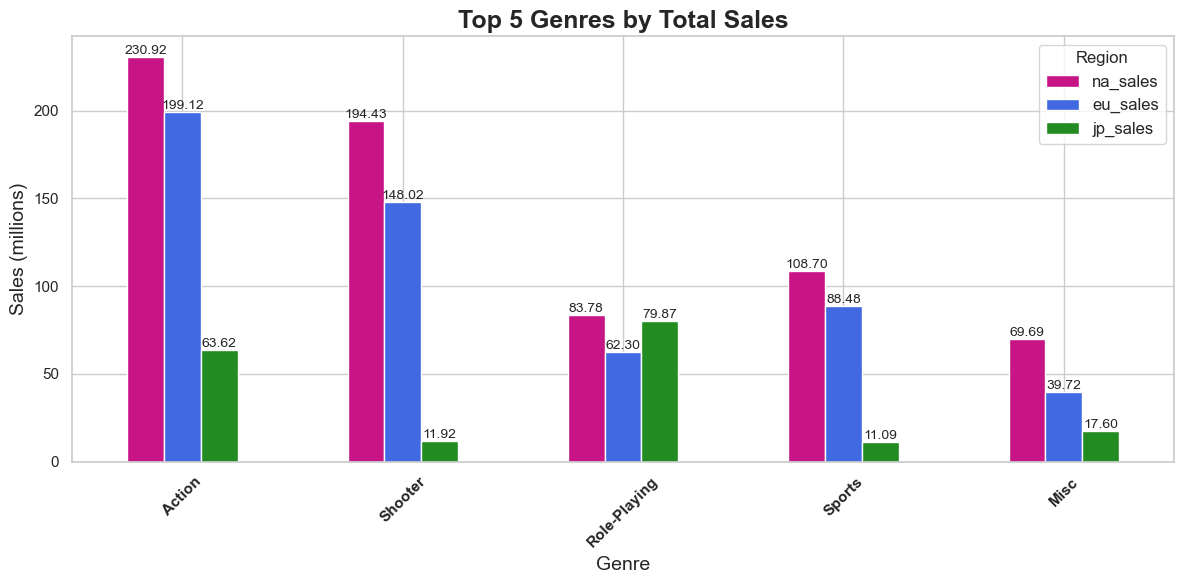

In [286]:
# Sum regional sales by 'genre'
sales_by_genre = recent_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Get top 5 genres with the most total sales of all regions
sales_by_genre['total_sales'] = sales_by_genre.sum(axis=1)
top_5_genres = sales_by_genre.nlargest(5, 'total_sales')

# Custom colors for the bars
colors = ['mediumvioletred', 'royalblue', 'forestgreen']

# Create the grouped bar chart
ax = top_5_genres[['na_sales', 'eu_sales', 'jp_sales']].plot(kind='bar', color=colors, figsize=(12, 6), edgecolor="white")

# Titles and labels
plt.title('Top 5 Genres by Total Sales', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales (millions)', fontsize=14)
plt.xticks(rotation=45, fontweight='bold')
plt.legend(title='Region', fontsize=12)

# Adding total sales above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

**Resultados**:

**Acción**: El género con más ventas (493.66 millones). Domina en NA y en EE. UU., y en JP es el tercero en ventas.

**Disparos**: Tiene 354.37 millones en ventas totales. Es el segundo género más vendido en NA y EE. UU., en JP ocupa el cuarto lugar.

**Juegos de Rol**: Tiene 225.95 millones en ventas, es el género más vendido en JP, el cuarto en NA y EE. UU.

**Deportes**: Con un total de 208.27 millones en ventas, es el tercero en ventas en NA y EE. UU., el último en JP.

**Misc**: Con un total de 127.01 millones, es el quinto en ventas en NA y EE. UU., y el cuarto más vendido en JP.

### 7.3 Discutir si las calificaciones ESRB afectan las ventas en las regiones individuales

#### 7.3.1 ESRB Rating: North America, Europe, y Japan 

In [287]:
# Filter rating by regional sales

rating_global = recent_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)
rating_global 

na_sales  eu_sales  jp_sales
rating                              
M         308.45    250.26     26.14
E         170.59    141.73     36.68
RP        123.69    116.64    138.21
E10+      117.72     78.00     11.23
T         109.31     83.16     33.39

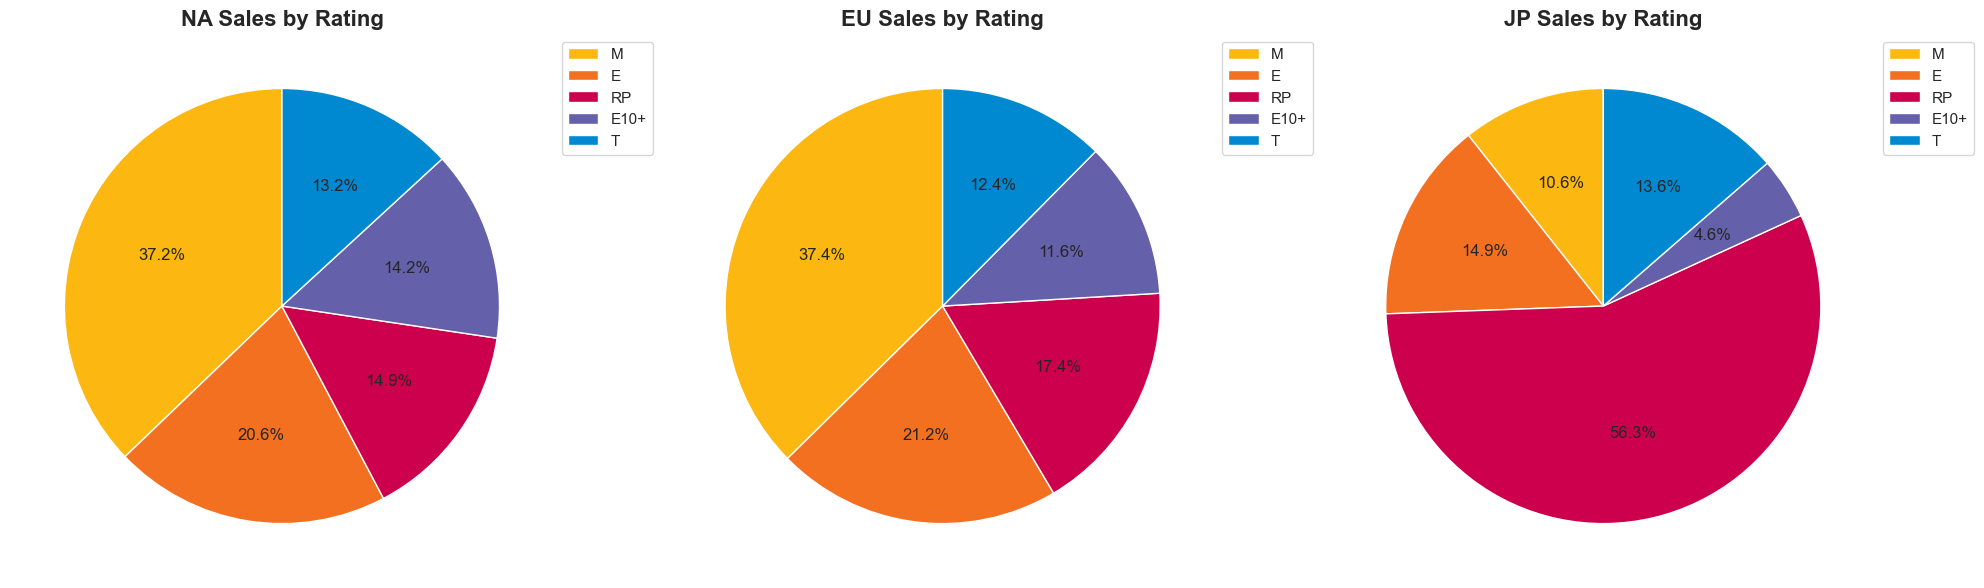

In [288]:
# Calculate total sales for each region
total_sales = rating_global.sum()

# Convert to percentages
rating_global_percentage = rating_global.div(total_sales) * 100

# Sort values by NA sales percentage
rating_global_percentage = rating_global_percentage.sort_values(by='na_sales', ascending=False)

# Custom colors
colors = ['#fcb711', '#f37021', '#cc004c', '#6460aa', '#0089d0', '#0db14b', '#3f4bac']


# Create three pie charts for NA, EU, and JP sales
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Pie chart for NA Sales
axes[0].pie(rating_global_percentage['na_sales'], 
            autopct='%1.1f%%', 
            colors=colors[:len(rating_global_percentage)], 
            startangle=90)
axes[0].set_title('NA Sales by Rating', fontsize=16, weight='bold')
axes[0].legend(rating_global_percentage.index, loc='upper left', bbox_to_anchor=(1, 1))

# Pie chart for EU Sales
axes[1].pie(rating_global_percentage['eu_sales'], 
            autopct='%1.1f%%', 
            colors=colors[:len(rating_global_percentage)], 
            startangle=90)
axes[1].set_title('EU Sales by Rating', fontsize=16, weight='bold')
axes[1].legend(rating_global_percentage.index, loc='upper left', bbox_to_anchor=(1, 1))

# Pie chart for JP Sales
axes[2].pie(rating_global_percentage['jp_sales'], 
            autopct='%1.1f%%', 
            colors=colors[:len(rating_global_percentage)], 
            startangle=90)
axes[2].set_title('JP Sales by Rating', fontsize=16, weight='bold')
axes[2].legend(rating_global_percentage.index, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### 7.3.2 Realizar un ANOVA para cada región

In [289]:
# This code performs an ANOVA test to check if there are significant differences in video game sales between Na, EU, and JP
# If the p-value is below the significance level alpha = 0.05, it indicates a significant difference in sales.

# Group sales by ESRB rating in each region
na_sales_groups = [recent_data['na_sales'].values for name, group in games.groupby('rating')]
eu_sales_groups = [recent_data['eu_sales'].values for name, group in games.groupby('rating')]
jp_sales_groups = [recent_data['jp_sales'].values for name, group in games.groupby('rating')]

# ANOVA tests
alpha = 0.05  # Significance level

na_anova = st.f_oneway(*na_sales_groups)
eu_anova = st.f_oneway(*eu_sales_groups)
jp_anova = st.f_oneway(*jp_sales_groups)

# Display results and check significance
print(f'ANOVA results for NA Sales: F-statistic = {na_anova.statistic}, p-value = {na_anova.pvalue}')
if na_anova.pvalue < alpha:
    print("NA Sales: Significant differences in sales between ESRB ratings (p < 0.05).")
else:
    print("NA Sales: No significant differences in sales between ESRB ratings (p >= 0.05).")

print(f'ANOVA results for EU Sales: F-statistic = {eu_anova.statistic}, p-value = {eu_anova.pvalue}')
if eu_anova.pvalue < alpha:
    print("EU Sales: Significant differences in sales between ESRB ratings (p < 0.05).")
else:
    print("EU Sales: No significant differences in sales between ESRB ratings (p >= 0.05).")

print(f'ANOVA results for JP Sales: F-statistic = {jp_anova.statistic}, p-value = {jp_anova.pvalue}')
if jp_anova.pvalue < alpha:
    print("JP Sales: Significant differences in sales between ESRB ratings (p < 0.05).")
else:
    print("JP Sales: No significant differences in sales between ESRB ratings (p >= 0.05).")

ANOVA results for NA Sales: F-statistic = 1.1109885860736683e-30, p-value = 1.0
NA Sales: No significant differences in sales between ESRB ratings (p >= 0.05).
ANOVA results for EU Sales: F-statistic = 3.6179068994083564e-30, p-value = 1.0
EU Sales: No significant differences in sales between ESRB ratings (p >= 0.05).
ANOVA results for JP Sales: F-statistic = 4.709623438495229e-30, p-value = 1.0
JP Sales: No significant differences in sales between ESRB ratings (p >= 0.05).


## 8. Pruebas de hipótesis

### 8.1 La puntuación media de los usuarios para las plataformas Xbox One y PC es la misma.

- **Hipótesis Nula (H0)**: La puntuación media de los usuarios entre las plataformas Xbox One y PC es la misma.
  
- **Hipótesis Alternativa (H1)**: La puntuación media de los usuarios entre las plataformas Xbox One y PC es diferente.

In [290]:
# Filter data for Xbox One and PC platforms
xone_uscores = recent_data[recent_data['platform'] == 'XOne']['user_score'].dropna()
pc_uscores =recent_data[recent_data['platform'] == 'PC']['user_score'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(xone_uscores, pc_uscores, equal_var=False) 
# Set significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 0.7877, P-value: 0.4312
Fail to reject the null hypothesis


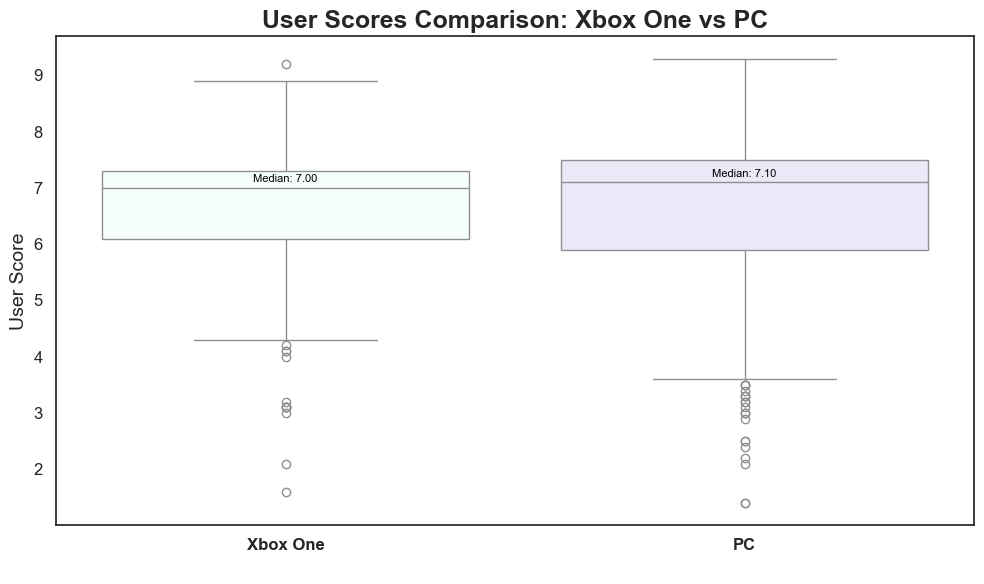

In [291]:
# Combine the scores into a DataFrame for plotting
scores_data = pd.DataFrame({
    'Platform': ['Xbox One'] * len(xone_uscores) + ['PC'] * len(pc_uscores),
    'User Score': list(xone_uscores) + list(pc_uscores)
})

# Set the style to white (to hide grid lines)
sns.set(style="white")

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot with two shades of purple
sns.boxplot(x='Platform', y='User Score', hue='Platform', data=scores_data, palette=['mintcream', 'lavender'])

# Hide the background
plt.gca().patch.set_visible(False)

# Calculate median scores
median_xbox = xone_uscores.median()
median_pc = pc_uscores.median()

# Add median annotations to the plot
plt.text(0, median_xbox + 0.1, f'Median: {median_xbox:.2f}', horizontalalignment='center', fontsize=8, color='black')
plt.text(1, median_pc + 0.1, f'Median: {median_pc:.2f}', horizontalalignment='center', fontsize=8, color='black')

# Titles and labels
plt.title('User Scores Comparison: Xbox One vs PC', fontsize=18, fontweight='bold')
plt.xlabel('Platform', color='white')
plt.ylabel('User Score', fontsize=14)

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

**Resultados**:

Las puntuaciones medias de los usuarios para las plataformas Xbox One y PC no son significativamente diferentes. Podemos ver que comparten **casi la misma mediana** para `user_score`.

**Resultados**:

- **Hipótesis nula (H0)**: La puntuación promedio de los usuarios entre los géneros de Acción y Deportes son diferentes.
  
- **Hipótesis alternativa (H1)**: La puntuación promedio de los usuarios entre los géneros de Acción y Deportes son las mismas.

In [292]:
# Filter data for Action and Sports genres
action_scores = recent_data[recent_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = recent_data[recent_data['genre'] == 'Sports']['user_score'].dropna()

# Perform an independent t-test
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)  # Welch’s t-test

# Set significance level
alpha = 0.05

# Print results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The average user ratings for Action and Sports genres are significantly different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for Action and Sports genres are not significantly different.")


T-statistic: 9.6923, P-value: 0.0000
Reject the null hypothesis: The average user ratings for Action and Sports genres are significantly different.


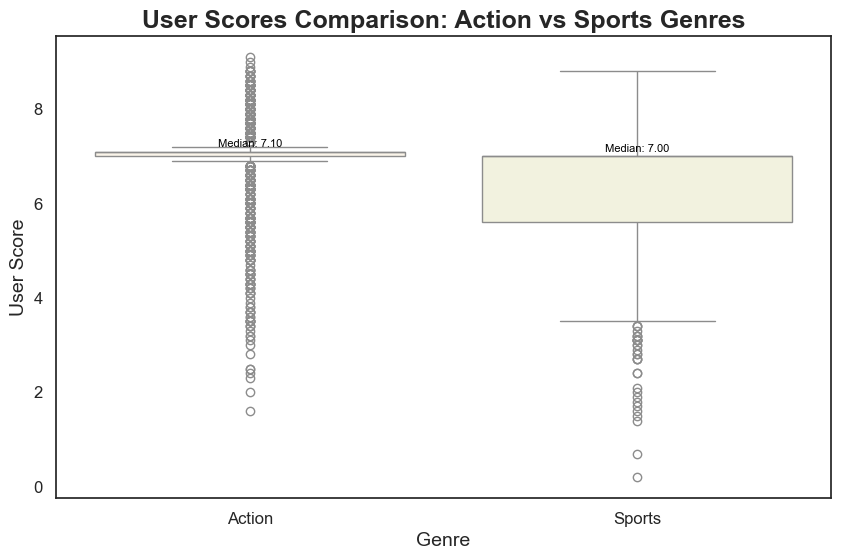

In [293]:
# Filter data for Action and Sports genres
action_scores = recent_data[recent_data['genre'] == 'Action']['user_score'].dropna()
sports_scores = recent_data[recent_data['genre'] == 'Sports']['user_score'].dropna()

# Combine the scores into a DataFrame for plotting
scores_data = pd.DataFrame({
    'Genre': ['Action'] * len(action_scores) + ['Sports'] * len(sports_scores),
    'User Score': list(action_scores) + list(sports_scores)
})

# Set the style to white (to hide grid lines)
sns.set(style="white")

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a box plot with two shades of purple
sns.boxplot(x='Genre', y='User Score', hue='Genre', data=scores_data, palette=['oldlace', 'beige'])

# Hide the background
plt.gca().patch.set_visible(False)

# Calculate median scores
median_action = action_scores.median()
median_sports = sports_scores.median()

# Add median annotations to the plot
plt.text(0, median_action + 0.1, f'Median: {median_action:.2f}', horizontalalignment='center', fontsize=8, color='black')
plt.text(1, median_sports + 0.1, f'Median: {median_sports:.2f}', horizontalalignment='center', fontsize=8, color='black')

# Titles and labels
plt.title('User Scores Comparison: Action vs Sports Genres', fontsize=18, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('User Score', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

**Resultados**:

Las puntuaciones promedio de los usuarios para los géneros de `Acción` y `Deportes` son significativamente diferentes. Podemos observar que comparten **casi la misma mediana** para `user_score`.

## 9. Conclusiones

**Resultados Principales**:

- Se debe señalar que las regiones de `NA` y `EU` tienden a dar resultados similares, en comparación con los resultados de la región `JP`.
- Es importante destacar que hay dos plataformas que, aunque no tienen altas ventas, son un mercado de ingresos bajos pero constante: `PC` y `PSV`.
- Las plataformas con más oportunidades de crecimiento son `PS4` y `XOne`.

- Los juegos de `Rol` son más populares en `JP`, y los de `Acción` y `Disparos` en `EU` y `NA`. `Deportes` también es popular en las 3 regiones.
- Debido a la gran cantidad de valores faltantes en la columna `'rating'`, es posible que esto sea el factor principal por el cual las ventas no se ven afectadas por esta clasificación.
- No existe correlación entre las calificaciones de los usuarios y los críticos con las ventas totales.

**Conclusión Principal**:
- Una cosa es segura, todas las próximas plataformas de `PS` tienen más posibilidades de éxito en ingresos, debido a la popularidad de las anteriores, junto con los nuevos modelos de `Xbox`. Los mejores géneros en ingresos son `Acción` y `Disparos`, lo que podría ser una excelente oportunidad para centrarse en la campaña del próximo año.